<a href="https://colab.research.google.com/github/ranpei97/E4511-2021-Pei/blob/main/Notebook/Classification_rf_hypertuned.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%tensorflow_version 1.x

TensorFlow 1.x selected.


In [ ]:
! wget -c https://repo.anaconda.com/archive/Anaconda3-2019.10-Linux-x86_64.sh
! chmod +x Anaconda3-2019.10-Linux-x86_64.sh
! bash ./Anaconda3-2019.10-Linux-x86_64.sh -b -f -p /usr/local

# ! wget -c https://repo.anaconda.com/miniconda/Miniconda3-py37_4.9.2-Linux-x86_64.sh 
# ! chmod +x Miniconda3-py37_4.9.2-Linux-x86_64.sh
# ! time bash Miniconda3-py37_4.9.2-Linux-x86_64.sh -b -f -p /usr/local

! time conda install -y -c deepchem -c rdkit -c conda-forge -c omnia deepchem-gpu=2.3.0
import sys
sys.path.append('/usr/local/lib/python3.7/site-packages/')

!pip install mordred
!pip install --upgrade bravado
!pip install molvs

!wget https://raw.githubusercontent.com/ravichas/AMPL-Tutorial/master/config/install_AMPL_GPU_test.sh

! chmod u+x install_AMPL_GPU_test.sh
! ./install_AMPL_GPU_test.sh

--2021-04-28 02:09:29--  https://repo.anaconda.com/archive/Anaconda3-2019.10-Linux-x86_64.sh
Resolving repo.anaconda.com (repo.anaconda.com)... 104.16.131.3, 104.16.130.3, 2606:4700::6810:8203, ...
Connecting to repo.anaconda.com (repo.anaconda.com)|104.16.131.3|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 530308481 (506M) [application/x-sh]
Saving to: ‘Anaconda3-2019.10-Linux-x86_64.sh’

Anaconda3-2019.10-L 100%[===================>] 505.74M   152MB/s    in 3.4s    

2021-04-28 02:09:33 (150 MB/s) - ‘Anaconda3-2019.10-Linux-x86_64.sh’ saved [530308481/530308481]

PREFIX=/usr/local
Unpacking payload ...
Solving environment: | / - \ | / - \ | / - \ | / - \ | / - \ done

## Package Plan ##

  environment location: /usr/local

  added / updated specs:
    - _ipyw_jlab_nb_ext_conf==0.1.0=py37_0
    - _libgcc_mutex==0.1=main
    - alabaster==0.7.12=py37_0
    - anaconda-client==1.7.2=py37_0
    - anaconda-navigator==1.9.7=

In [ ]:
!wget https://raw.githubusercontent.com/ranpei97/E4511-2021-Pei/main/HTR2A_cur.csv

--2021-04-28 05:51:37--  https://raw.githubusercontent.com/ranpei97/E4511-2021-Pei/main/HTR2A_cur.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 343123 (335K) [text/plain]
Saving to: ‘HTR2A_cur.csv’

HTR2A_cur.csv       100%[===================>] 335.08K  --.-KB/s    in 0.03s   

2021-04-28 05:51:38 (9.82 MB/s) - ‘HTR2A_cur.csv’ saved [343123/343123]



In [ ]:
!pip install hyperopt

     |████████████████████████████████| 972kB 6.6MB/s 


In [ ]:

import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
sns.set_context("poster")
sns.set_style("whitegrid")
sns.set_palette("Set2")

import pandas as pd
import os, json, sys, glob, pickle

from atomsci.ddm.pipeline import parameter_parser as parse
import atomsci.ddm.pipeline.model_pipeline as mp
from atomsci.ddm.pipeline import perf_data

from hyperopt import fmin, tpe, hp, Trials, STATUS_OK

The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.



In [ ]:
h1 = pd.read_csv("HTR2A_cur.csv", index_col=0)

In [ ]:
train_file = "HTR2A_cur.csv"
response_col = "active"
compound_id = "compound_id"
smiles_col = "base_rdkit_smiles"

params = {
        "system": "LC",
        "lc_account": 'None',
        "datastore": "False",
        "save_results": "False",
        "data_owner": "username",
        "prediction_type": "classification",
        "dataset_key": train_file,
        "id_col": compound_id,
        "smiles_col": smiles_col,
        "response_cols": response_col,
        "previously_split": "False",
        "split_only": "True",
        "featurizer": "ecfp",
        "model_type": "RF",
        "verbose": "True",
        "transformers": "True",
        'max_epochs': '70',
        "rerun": "False",
        "result_dir": "split"
    }

ampl_param = parse.wrapper(params)
pl = mp.ModelPipeline(ampl_param)
pl.train_model()

2021-04-28 05:51:57,817 Splitting data by scaffold


number of features: 1024


2021-04-28 05:52:00,346 Dataset split table saved to /HTR2A_cur_train_valid_test_scaffold_355f3881-d1d2-4bfd-9652-1a4ef0bdeb23.csv


In [ ]:
listing = glob.glob(os.path.join("/", "HTR2A_cur_train_valid_test_scaffold_*"))
name = listing[0]
split_uuid = name.split("_")[-1].split(".")[0]
response_col = "active"

params = {
        "system": "LC",
        "lc_account": 'None',
        "datastore": "False",
        "save_results": "False",
        "data_owner": "username",
        "prediction_type": "classification",
        "dataset_key": train_file,
        "id_col": compound_id,
        "smiles_col": smiles_col,
        "response_cols": response_col,
        "split_uuid": split_uuid,
        "previously_split": "True",
        "featurizer": "ecfp",
        "model_type": "RF",
        "verbose": "True",
        "transformers": "True",
        'max_epochs': '70',
        "rerun": "False",
        "result_dir": "ampl_output"
    }

In [ ]:
ampl_param = parse.wrapper(params)
pl = mp.ModelPipeline(ampl_param)
pl.train_model()

number of features: 1024


2021-04-28 05:58:28,928 Previous dataset split restored
2021-04-28 05:58:37,502 Wrote model metadata to file ampl_output/HTR2A_cur/RF_ecfp_scaffold_classification/84cdb0a5-bcca-4cfa-8fa3-4b3da8d80972/model_metadata.json
2021-04-28 05:58:37,846 Wrote model metrics to file ampl_output/HTR2A_cur/RF_ecfp_scaffold_classification/84cdb0a5-bcca-4cfa-8fa3-4b3da8d80972/model_metrics.json


Wrote model tarball to ampl_output/HTR2A_cur_model_84cdb0a5-bcca-4cfa-8fa3-4b3da8d80972.tar.gz


In [ ]:

pred_data = pl.model_wrapper.get_perf_data(subset="valid", epoch_label="best")
pred_results = pred_data.get_prediction_results()
print(f"AUC score of validation set: {pred_results['roc_auc_score']:.3f}")

AUC score of validation set: 0.860


In [ ]:

# Adding uncertainty to base training model
listing = glob.glob(os.path.join("/", "HTR2A_cur_train_valid_test_scaffold_*"))
name = listing[0]
split_uuid = name.split("_")[-1].split(".")[0]
response_col = "active"

params = {
        "system": "LC",
        "lc_account": 'None',
        "datastore": "False",
        "save_results": "False",
        "data_owner": "username",
        "prediction_type": "classification",
        "dataset_key": train_file,
        "id_col": compound_id,
        "smiles_col": smiles_col,
        "response_cols": response_col,
        "split_uuid": split_uuid,
        "previously_split": "True",
        "featurizer": "ecfp",
        "model_type": "RF",
        "verbose": "True",
        "transformers": "True",
        'max_epochs': '70',
        "rerun": "False",
        "result_dir": "ampl_output",
        "uncertainty": "True"
    }

In [ ]:
ampl_param = parse.wrapper(params)
pl = mp.ModelPipeline(ampl_param)
pl.train_model()

number of features: 1024


2021-04-28 06:01:42,613 Previous dataset split restored
2021-04-28 06:01:50,408 Wrote model metadata to file ampl_output/HTR2A_cur/RF_ecfp_scaffold_classification/3f6ba349-1203-4921-8572-9a56538220e5/model_metadata.json
2021-04-28 06:01:50,748 Wrote model metrics to file ampl_output/HTR2A_cur/RF_ecfp_scaffold_classification/3f6ba349-1203-4921-8572-9a56538220e5/model_metrics.json


Wrote model tarball to ampl_output/HTR2A_cur_model_3f6ba349-1203-4921-8572-9a56538220e5.tar.gz


In [ ]:
pred_data = pl.model_wrapper.get_perf_data(subset="valid", epoch_label="best")
pred_results = pred_data.get_prediction_results()
print(f"AUC score of validation set: {pred_results['roc_auc_score']:.3f}")

AUC score of validation set: 0.857


In [ ]:

pred_df = pl.predict_on_dataframe(h1)
pred_df = pred_df.merge(h1[["base_rdkit_smiles", "active"]], on="base_rdkit_smiles")
pred_df = pred_df.assign(pred_error=pred_df.active-pred_df.pred)

2021-04-28 06:08:36,590 Featurizing data...
2021-04-28 06:08:50,009 Done


number of features: 1024


In [ ]:
pred_df

,base_rdkit_smiles,pred,active,pred_error
0,CCC[C@@H](CCO)Nc1nc(N)nc2cc(OC)ccc12,0,0,0
1,Clc1ccc(-c2ccc(C#Cc3ccc(OCCN4CCCC4)cc3)nc2)cc1,0,0,0
2,Nc1ccc(S(=O)(=O)n2cc(C3CCNCC3)c3ccc(Cl)cc32)cc1,0,0,0
3,c1ccc2c(c1)Cc1ccccc1C21CCCNC1,0,0,0
4,Clc1cccc2cc3n(c12)CCNC3,0,0,0
...,...,...,...,...
2857,CCNC(=O)c1ccnc(OCCCCN2CCC(c3noc4cc(F)ccc34)CC2)c1,1,1,0
2858,C[C@@H]1CNC[C@H]2Cc3ccc(C#N)cc3N12,0,0,0
2859,CC(=O)N(C)c1ccc(OC2CN(c3c4c(nc5ccnn35)CCNCC4)C...,0,0,0
2860,O=S(=O)(NCCCN1CCC(c2noc3cc(F)ccc23)CC1)c1ccc(O...,1,1,0


**Grid search Hyperparameter Tuning** 

In [ ]:
estimators = [16,32,64,128]
depth=[16,32,64,128]
features=[16,32,64,128]

rfe_list = []
rfd_list = []
rff_list = []
valid_auc_list = []
for rf_estimator in estimators:
    for rf_depth in depth:
        for rf_feature in features:
            params["rf_estimators"] = rf_estimator
            params["rf_max_depth"] = rf_depth
            params["rf_max_features"] = rf_feature
            rfe_list.append(rf_estimator)
            rfd_list.append(rf_depth)
            rff_list.append(rf_feature)
            tp = parse.wrapper(params)
            pl = mp.ModelPipeline(tp)
            pl.train_model()
            pred_data = pl.model_wrapper.get_perf_data(subset="valid", epoch_label="best")
            pred_results = pred_data.get_prediction_results()
            valid_auc = pred_results['roc_auc_score']
            valid_auc_list.append(valid_auc)
            print(f"rf_estimators: {rf_estimator}, rf_max_depth: {rf_depth}, rf_max_features: {rf_feature}, valid_auc: {valid_auc}")

number of features: 1024


2021-04-28 06:12:02,300 Previous dataset split restored
2021-04-28 06:12:03,830 Wrote model metadata to file ampl_output/HTR2A_cur/RF_ecfp_scaffold_classification/edec8f4d-eae1-4b61-a828-2373c8b0f435/model_metadata.json
2021-04-28 06:12:03,842 Wrote model metrics to file ampl_output/HTR2A_cur/RF_ecfp_scaffold_classification/edec8f4d-eae1-4b61-a828-2373c8b0f435/model_metrics.json


Wrote model tarball to ampl_output/HTR2A_cur_model_edec8f4d-eae1-4b61-a828-2373c8b0f435.tar.gz
rf_estimators: 16, rf_max_depth: 16, rf_max_features: 16, valid_auc: 0.8100206205813041
number of features: 1024


2021-04-28 06:12:18,288 Previous dataset split restored
2021-04-28 06:12:19,951 Wrote model metadata to file ampl_output/HTR2A_cur/RF_ecfp_scaffold_classification/5f42efd0-d7a6-446d-b420-4a685339a777/model_metadata.json
2021-04-28 06:12:19,970 Wrote model metrics to file ampl_output/HTR2A_cur/RF_ecfp_scaffold_classification/5f42efd0-d7a6-446d-b420-4a685339a777/model_metrics.json


Wrote model tarball to ampl_output/HTR2A_cur_model_5f42efd0-d7a6-446d-b420-4a685339a777.tar.gz
rf_estimators: 16, rf_max_depth: 16, rf_max_features: 32, valid_auc: 0.8096032992930087
number of features: 1024


2021-04-28 06:12:34,390 Previous dataset split restored
2021-04-28 06:12:36,053 Wrote model metadata to file ampl_output/HTR2A_cur/RF_ecfp_scaffold_classification/b7e15956-3233-4247-ae00-3e30ab91a6a3/model_metadata.json
2021-04-28 06:12:36,069 Wrote model metrics to file ampl_output/HTR2A_cur/RF_ecfp_scaffold_classification/b7e15956-3233-4247-ae00-3e30ab91a6a3/model_metrics.json


Wrote model tarball to ampl_output/HTR2A_cur_model_b7e15956-3233-4247-ae00-3e30ab91a6a3.tar.gz
rf_estimators: 16, rf_max_depth: 16, rf_max_features: 64, valid_auc: 0.8375147289866458
number of features: 1024


2021-04-28 06:12:50,412 Previous dataset split restored
2021-04-28 06:12:52,155 Wrote model metadata to file ampl_output/HTR2A_cur/RF_ecfp_scaffold_classification/f3e7ad9d-7ef4-44e9-bf25-4aeba32b665a/model_metadata.json
2021-04-28 06:12:52,167 Wrote model metrics to file ampl_output/HTR2A_cur/RF_ecfp_scaffold_classification/f3e7ad9d-7ef4-44e9-bf25-4aeba32b665a/model_metrics.json


Wrote model tarball to ampl_output/HTR2A_cur_model_f3e7ad9d-7ef4-44e9-bf25-4aeba32b665a.tar.gz
rf_estimators: 16, rf_max_depth: 16, rf_max_features: 128, valid_auc: 0.8323104870384918
number of features: 1024


2021-04-28 06:13:06,465 Previous dataset split restored
2021-04-28 06:13:08,117 Wrote model metadata to file ampl_output/HTR2A_cur/RF_ecfp_scaffold_classification/8a431cb8-0936-4a68-954c-4ed79e2e7fa6/model_metadata.json
2021-04-28 06:13:08,136 Wrote model metrics to file ampl_output/HTR2A_cur/RF_ecfp_scaffold_classification/8a431cb8-0936-4a68-954c-4ed79e2e7fa6/model_metrics.json


Wrote model tarball to ampl_output/HTR2A_cur_model_8a431cb8-0936-4a68-954c-4ed79e2e7fa6.tar.gz
rf_estimators: 16, rf_max_depth: 32, rf_max_features: 16, valid_auc: 0.832826001571092
number of features: 1024


2021-04-28 06:13:22,546 Previous dataset split restored
2021-04-28 06:13:24,187 Wrote model metadata to file ampl_output/HTR2A_cur/RF_ecfp_scaffold_classification/9dc093ac-6525-4bc8-9c6d-af4e19327626/model_metadata.json
2021-04-28 06:13:24,203 Wrote model metrics to file ampl_output/HTR2A_cur/RF_ecfp_scaffold_classification/9dc093ac-6525-4bc8-9c6d-af4e19327626/model_metrics.json


Wrote model tarball to ampl_output/HTR2A_cur_model_9dc093ac-6525-4bc8-9c6d-af4e19327626.tar.gz
rf_estimators: 16, rf_max_depth: 32, rf_max_features: 32, valid_auc: 0.8448546739984288
number of features: 1024


2021-04-28 06:13:38,732 Previous dataset split restored
2021-04-28 06:13:40,491 Wrote model metadata to file ampl_output/HTR2A_cur/RF_ecfp_scaffold_classification/ce732aba-f8bb-45cc-8b99-b7430302dd04/model_metadata.json
2021-04-28 06:13:40,508 Wrote model metrics to file ampl_output/HTR2A_cur/RF_ecfp_scaffold_classification/ce732aba-f8bb-45cc-8b99-b7430302dd04/model_metrics.json


Wrote model tarball to ampl_output/HTR2A_cur_model_ce732aba-f8bb-45cc-8b99-b7430302dd04.tar.gz
rf_estimators: 16, rf_max_depth: 32, rf_max_features: 64, valid_auc: 0.8480214061272585
number of features: 1024


2021-04-28 06:13:54,905 Previous dataset split restored
2021-04-28 06:13:56,732 Wrote model metadata to file ampl_output/HTR2A_cur/RF_ecfp_scaffold_classification/22733a96-2fc0-4b63-8a01-40a748271f61/model_metadata.json
2021-04-28 06:13:56,746 Wrote model metrics to file ampl_output/HTR2A_cur/RF_ecfp_scaffold_classification/22733a96-2fc0-4b63-8a01-40a748271f61/model_metrics.json


Wrote model tarball to ampl_output/HTR2A_cur_model_22733a96-2fc0-4b63-8a01-40a748271f61.tar.gz
rf_estimators: 16, rf_max_depth: 32, rf_max_features: 128, valid_auc: 0.8492979183032208
number of features: 1024


2021-04-28 06:14:11,095 Previous dataset split restored
2021-04-28 06:14:12,735 Wrote model metadata to file ampl_output/HTR2A_cur/RF_ecfp_scaffold_classification/0a60de59-28b8-42f1-922e-aa2cf2454843/model_metadata.json
2021-04-28 06:14:12,754 Wrote model metrics to file ampl_output/HTR2A_cur/RF_ecfp_scaffold_classification/0a60de59-28b8-42f1-922e-aa2cf2454843/model_metrics.json


Wrote model tarball to ampl_output/HTR2A_cur_model_0a60de59-28b8-42f1-922e-aa2cf2454843.tar.gz
rf_estimators: 16, rf_max_depth: 64, rf_max_features: 16, valid_auc: 0.8398713668499607
number of features: 1024


2021-04-28 06:14:27,172 Previous dataset split restored
2021-04-28 06:14:28,811 Wrote model metadata to file ampl_output/HTR2A_cur/RF_ecfp_scaffold_classification/8815e57e-9a97-47fc-9b11-6f5296148ced/model_metadata.json
2021-04-28 06:14:28,830 Wrote model metrics to file ampl_output/HTR2A_cur/RF_ecfp_scaffold_classification/8815e57e-9a97-47fc-9b11-6f5296148ced/model_metrics.json


Wrote model tarball to ampl_output/HTR2A_cur_model_8815e57e-9a97-47fc-9b11-6f5296148ced.tar.gz
rf_estimators: 16, rf_max_depth: 64, rf_max_features: 32, valid_auc: 0.8178024351924587
number of features: 1024


2021-04-28 06:14:43,202 Previous dataset split restored
2021-04-28 06:14:44,939 Wrote model metadata to file ampl_output/HTR2A_cur/RF_ecfp_scaffold_classification/b1d4dc3e-b27b-4c0f-a6e4-49b7b4c2dc13/model_metadata.json
2021-04-28 06:14:44,954 Wrote model metrics to file ampl_output/HTR2A_cur/RF_ecfp_scaffold_classification/b1d4dc3e-b27b-4c0f-a6e4-49b7b4c2dc13/model_metrics.json


Wrote model tarball to ampl_output/HTR2A_cur_model_b1d4dc3e-b27b-4c0f-a6e4-49b7b4c2dc13.tar.gz
rf_estimators: 16, rf_max_depth: 64, rf_max_features: 64, valid_auc: 0.8337342890809113
number of features: 1024


2021-04-28 06:14:59,438 Previous dataset split restored
2021-04-28 06:15:01,287 Wrote model metadata to file ampl_output/HTR2A_cur/RF_ecfp_scaffold_classification/94bef6a4-09dd-49b5-9a80-6dd03e2ff009/model_metadata.json
2021-04-28 06:15:01,301 Wrote model metrics to file ampl_output/HTR2A_cur/RF_ecfp_scaffold_classification/94bef6a4-09dd-49b5-9a80-6dd03e2ff009/model_metrics.json


Wrote model tarball to ampl_output/HTR2A_cur_model_94bef6a4-09dd-49b5-9a80-6dd03e2ff009.tar.gz
rf_estimators: 16, rf_max_depth: 64, rf_max_features: 128, valid_auc: 0.8190298507462686
number of features: 1024


2021-04-28 06:15:15,629 Previous dataset split restored
2021-04-28 06:15:17,269 Wrote model metadata to file ampl_output/HTR2A_cur/RF_ecfp_scaffold_classification/b894b19d-5406-4e8b-96f4-c4971854ed4e/model_metadata.json
2021-04-28 06:15:17,291 Wrote model metrics to file ampl_output/HTR2A_cur/RF_ecfp_scaffold_classification/b894b19d-5406-4e8b-96f4-c4971854ed4e/model_metrics.json


Wrote model tarball to ampl_output/HTR2A_cur_model_b894b19d-5406-4e8b-96f4-c4971854ed4e.tar.gz
rf_estimators: 16, rf_max_depth: 128, rf_max_features: 16, valid_auc: 0.8342252553024352
number of features: 1024


2021-04-28 06:15:31,721 Previous dataset split restored
2021-04-28 06:15:33,386 Wrote model metadata to file ampl_output/HTR2A_cur/RF_ecfp_scaffold_classification/e05dc835-bb83-43c1-9071-4a10b6b34e06/model_metadata.json
2021-04-28 06:15:33,404 Wrote model metrics to file ampl_output/HTR2A_cur/RF_ecfp_scaffold_classification/e05dc835-bb83-43c1-9071-4a10b6b34e06/model_metrics.json


Wrote model tarball to ampl_output/HTR2A_cur_model_e05dc835-bb83-43c1-9071-4a10b6b34e06.tar.gz
rf_estimators: 16, rf_max_depth: 128, rf_max_features: 32, valid_auc: 0.817090534171249
number of features: 1024


2021-04-28 06:15:47,851 Previous dataset split restored
2021-04-28 06:15:49,575 Wrote model metadata to file ampl_output/HTR2A_cur/RF_ecfp_scaffold_classification/8c6151e5-facb-4795-ac79-edb3b4bcc493/model_metadata.json
2021-04-28 06:15:49,591 Wrote model metrics to file ampl_output/HTR2A_cur/RF_ecfp_scaffold_classification/8c6151e5-facb-4795-ac79-edb3b4bcc493/model_metrics.json


Wrote model tarball to ampl_output/HTR2A_cur_model_8c6151e5-facb-4795-ac79-edb3b4bcc493.tar.gz
rf_estimators: 16, rf_max_depth: 128, rf_max_features: 64, valid_auc: 0.8398713668499607
number of features: 1024


2021-04-28 06:16:03,936 Previous dataset split restored
2021-04-28 06:16:05,767 Wrote model metadata to file ampl_output/HTR2A_cur/RF_ecfp_scaffold_classification/cb179063-844f-4244-941f-703aad1218a4/model_metadata.json
2021-04-28 06:16:05,783 Wrote model metrics to file ampl_output/HTR2A_cur/RF_ecfp_scaffold_classification/cb179063-844f-4244-941f-703aad1218a4/model_metrics.json


Wrote model tarball to ampl_output/HTR2A_cur_model_cb179063-844f-4244-941f-703aad1218a4.tar.gz
rf_estimators: 16, rf_max_depth: 128, rf_max_features: 128, valid_auc: 0.8405587195600943
number of features: 1024


2021-04-28 06:16:20,153 Previous dataset split restored
2021-04-28 06:16:21,830 Wrote model metadata to file ampl_output/HTR2A_cur/RF_ecfp_scaffold_classification/e4ee057d-dd7b-48f6-9638-de7503dbda7b/model_metadata.json
2021-04-28 06:16:21,847 Wrote model metrics to file ampl_output/HTR2A_cur/RF_ecfp_scaffold_classification/e4ee057d-dd7b-48f6-9638-de7503dbda7b/model_metrics.json


Wrote model tarball to ampl_output/HTR2A_cur_model_e4ee057d-dd7b-48f6-9638-de7503dbda7b.tar.gz
rf_estimators: 32, rf_max_depth: 16, rf_max_features: 16, valid_auc: 0.8297820109976434
number of features: 1024


2021-04-28 06:16:36,240 Previous dataset split restored
2021-04-28 06:16:38,023 Wrote model metadata to file ampl_output/HTR2A_cur/RF_ecfp_scaffold_classification/d786283e-0fdb-45dc-ae41-ea07e99e6b6d/model_metadata.json
2021-04-28 06:16:38,040 Wrote model metrics to file ampl_output/HTR2A_cur/RF_ecfp_scaffold_classification/d786283e-0fdb-45dc-ae41-ea07e99e6b6d/model_metrics.json


Wrote model tarball to ampl_output/HTR2A_cur_model_d786283e-0fdb-45dc-ae41-ea07e99e6b6d.tar.gz
rf_estimators: 32, rf_max_depth: 16, rf_max_features: 32, valid_auc: 0.8455911233307147
number of features: 1024


2021-04-28 06:16:52,420 Previous dataset split restored
2021-04-28 06:16:54,291 Wrote model metadata to file ampl_output/HTR2A_cur/RF_ecfp_scaffold_classification/15faf7f8-e88e-442d-b9ed-399871a38f2b/model_metadata.json
2021-04-28 06:16:54,307 Wrote model metrics to file ampl_output/HTR2A_cur/RF_ecfp_scaffold_classification/15faf7f8-e88e-442d-b9ed-399871a38f2b/model_metrics.json


Wrote model tarball to ampl_output/HTR2A_cur_model_15faf7f8-e88e-442d-b9ed-399871a38f2b.tar.gz
rf_estimators: 32, rf_max_depth: 16, rf_max_features: 64, valid_auc: 0.8322368421052632
number of features: 1024


2021-04-28 06:17:08,730 Previous dataset split restored
2021-04-28 06:17:10,827 Wrote model metadata to file ampl_output/HTR2A_cur/RF_ecfp_scaffold_classification/67f0ff97-b476-4720-8a10-48548b6273f4/model_metadata.json
2021-04-28 06:17:10,843 Wrote model metrics to file ampl_output/HTR2A_cur/RF_ecfp_scaffold_classification/67f0ff97-b476-4720-8a10-48548b6273f4/model_metrics.json


Wrote model tarball to ampl_output/HTR2A_cur_model_67f0ff97-b476-4720-8a10-48548b6273f4.tar.gz
rf_estimators: 32, rf_max_depth: 16, rf_max_features: 128, valid_auc: 0.8407796543597801
number of features: 1024


2021-04-28 06:17:25,351 Previous dataset split restored
2021-04-28 06:17:27,162 Wrote model metadata to file ampl_output/HTR2A_cur/RF_ecfp_scaffold_classification/ae391bd6-7e8a-4ea7-ba80-a1b3c0192a5b/model_metadata.json
2021-04-28 06:17:27,201 Wrote model metrics to file ampl_output/HTR2A_cur/RF_ecfp_scaffold_classification/ae391bd6-7e8a-4ea7-ba80-a1b3c0192a5b/model_metrics.json


Wrote model tarball to ampl_output/HTR2A_cur_model_ae391bd6-7e8a-4ea7-ba80-a1b3c0192a5b.tar.gz
rf_estimators: 32, rf_max_depth: 32, rf_max_features: 16, valid_auc: 0.8434799685781619
number of features: 1024


2021-04-28 06:17:41,688 Previous dataset split restored
2021-04-28 06:17:43,493 Wrote model metadata to file ampl_output/HTR2A_cur/RF_ecfp_scaffold_classification/e7fe98ff-f094-48ce-9ea8-6d80beb343e9/model_metadata.json
2021-04-28 06:17:43,521 Wrote model metrics to file ampl_output/HTR2A_cur/RF_ecfp_scaffold_classification/e7fe98ff-f094-48ce-9ea8-6d80beb343e9/model_metrics.json


Wrote model tarball to ampl_output/HTR2A_cur_model_e7fe98ff-f094-48ce-9ea8-6d80beb343e9.tar.gz
rf_estimators: 32, rf_max_depth: 32, rf_max_features: 32, valid_auc: 0.8232030636292222
number of features: 1024


2021-04-28 06:17:58,046 Previous dataset split restored
2021-04-28 06:18:00,047 Wrote model metadata to file ampl_output/HTR2A_cur/RF_ecfp_scaffold_classification/a5f9d4ae-747a-47e7-9cfa-629832f72fdf/model_metadata.json
2021-04-28 06:18:00,072 Wrote model metrics to file ampl_output/HTR2A_cur/RF_ecfp_scaffold_classification/a5f9d4ae-747a-47e7-9cfa-629832f72fdf/model_metrics.json


Wrote model tarball to ampl_output/HTR2A_cur_model_a5f9d4ae-747a-47e7-9cfa-629832f72fdf.tar.gz
rf_estimators: 32, rf_max_depth: 32, rf_max_features: 64, valid_auc: 0.8569324430479184
number of features: 1024


2021-04-28 06:18:14,415 Previous dataset split restored
2021-04-28 06:18:16,718 Wrote model metadata to file ampl_output/HTR2A_cur/RF_ecfp_scaffold_classification/139b7972-a1d7-47c4-a245-477b4dbf8e5e/model_metadata.json
2021-04-28 06:18:16,740 Wrote model metrics to file ampl_output/HTR2A_cur/RF_ecfp_scaffold_classification/139b7972-a1d7-47c4-a245-477b4dbf8e5e/model_metrics.json


Wrote model tarball to ampl_output/HTR2A_cur_model_139b7972-a1d7-47c4-a245-477b4dbf8e5e.tar.gz
rf_estimators: 32, rf_max_depth: 32, rf_max_features: 128, valid_auc: 0.8595836606441476
number of features: 1024


2021-04-28 06:18:31,205 Previous dataset split restored
2021-04-28 06:18:33,002 Wrote model metadata to file ampl_output/HTR2A_cur/RF_ecfp_scaffold_classification/c07bab50-1cdf-4689-886c-8177b2563d7b/model_metadata.json
2021-04-28 06:18:33,033 Wrote model metrics to file ampl_output/HTR2A_cur/RF_ecfp_scaffold_classification/c07bab50-1cdf-4689-886c-8177b2563d7b/model_metrics.json


Wrote model tarball to ampl_output/HTR2A_cur_model_c07bab50-1cdf-4689-886c-8177b2563d7b.tar.gz
rf_estimators: 32, rf_max_depth: 64, rf_max_features: 16, valid_auc: 0.8347407698350354
number of features: 1024


2021-04-28 06:18:47,435 Previous dataset split restored
2021-04-28 06:18:49,359 Wrote model metadata to file ampl_output/HTR2A_cur/RF_ecfp_scaffold_classification/4f09d352-7bbb-45eb-a909-d77fa7acfe74/model_metadata.json
2021-04-28 06:18:49,388 Wrote model metrics to file ampl_output/HTR2A_cur/RF_ecfp_scaffold_classification/4f09d352-7bbb-45eb-a909-d77fa7acfe74/model_metrics.json


Wrote model tarball to ampl_output/HTR2A_cur_model_4f09d352-7bbb-45eb-a909-d77fa7acfe74.tar.gz
rf_estimators: 32, rf_max_depth: 64, rf_max_features: 32, valid_auc: 0.847726826394344
number of features: 1024


2021-04-28 06:19:03,723 Previous dataset split restored
2021-04-28 06:19:05,700 Wrote model metadata to file ampl_output/HTR2A_cur/RF_ecfp_scaffold_classification/3340face-de63-4e69-b7f8-3c4909ace1f0/model_metadata.json
2021-04-28 06:19:05,725 Wrote model metrics to file ampl_output/HTR2A_cur/RF_ecfp_scaffold_classification/3340face-de63-4e69-b7f8-3c4909ace1f0/model_metrics.json


Wrote model tarball to ampl_output/HTR2A_cur_model_3340face-de63-4e69-b7f8-3c4909ace1f0.tar.gz
rf_estimators: 32, rf_max_depth: 64, rf_max_features: 64, valid_auc: 0.8573252160251374
number of features: 1024


2021-04-28 06:19:20,250 Previous dataset split restored
2021-04-28 06:19:22,570 Wrote model metadata to file ampl_output/HTR2A_cur/RF_ecfp_scaffold_classification/6a06786b-4930-42e1-a01a-0b10e8352a8b/model_metadata.json
2021-04-28 06:19:22,595 Wrote model metrics to file ampl_output/HTR2A_cur/RF_ecfp_scaffold_classification/6a06786b-4930-42e1-a01a-0b10e8352a8b/model_metrics.json


Wrote model tarball to ampl_output/HTR2A_cur_model_6a06786b-4930-42e1-a01a-0b10e8352a8b.tar.gz
rf_estimators: 32, rf_max_depth: 64, rf_max_features: 128, valid_auc: 0.8539375490966222
number of features: 1024


2021-04-28 06:19:37,097 Previous dataset split restored
2021-04-28 06:19:38,912 Wrote model metadata to file ampl_output/HTR2A_cur/RF_ecfp_scaffold_classification/8a106fb1-5d7c-4899-8a47-4bc16a73b1cb/model_metadata.json
2021-04-28 06:19:38,944 Wrote model metrics to file ampl_output/HTR2A_cur/RF_ecfp_scaffold_classification/8a106fb1-5d7c-4899-8a47-4bc16a73b1cb/model_metrics.json


Wrote model tarball to ampl_output/HTR2A_cur_model_8a106fb1-5d7c-4899-8a47-4bc16a73b1cb.tar.gz
rf_estimators: 32, rf_max_depth: 128, rf_max_features: 16, valid_auc: 0.8375638256087982
number of features: 1024


2021-04-28 06:19:53,395 Previous dataset split restored
2021-04-28 06:19:55,286 Wrote model metadata to file ampl_output/HTR2A_cur/RF_ecfp_scaffold_classification/b0c8b2cc-d3ab-4d71-80f5-abe4ae1f4637/model_metadata.json
2021-04-28 06:19:55,315 Wrote model metrics to file ampl_output/HTR2A_cur/RF_ecfp_scaffold_classification/b0c8b2cc-d3ab-4d71-80f5-abe4ae1f4637/model_metrics.json


Wrote model tarball to ampl_output/HTR2A_cur_model_b0c8b2cc-d3ab-4d71-80f5-abe4ae1f4637.tar.gz
rf_estimators: 32, rf_max_depth: 128, rf_max_features: 32, valid_auc: 0.8494697564807542
number of features: 1024


2021-04-28 06:20:09,757 Previous dataset split restored
2021-04-28 06:20:11,737 Wrote model metadata to file ampl_output/HTR2A_cur/RF_ecfp_scaffold_classification/0954c0a0-2cb0-4903-8cf3-cf72808905b6/model_metadata.json
2021-04-28 06:20:11,763 Wrote model metrics to file ampl_output/HTR2A_cur/RF_ecfp_scaffold_classification/0954c0a0-2cb0-4903-8cf3-cf72808905b6/model_metrics.json


Wrote model tarball to ampl_output/HTR2A_cur_model_0954c0a0-2cb0-4903-8cf3-cf72808905b6.tar.gz
rf_estimators: 32, rf_max_depth: 128, rf_max_features: 64, valid_auc: 0.849101531814611
number of features: 1024


2021-04-28 06:20:26,139 Previous dataset split restored
2021-04-28 06:20:28,418 Wrote model metadata to file ampl_output/HTR2A_cur/RF_ecfp_scaffold_classification/339f27f7-17be-4324-82cb-956411b77304/model_metadata.json
2021-04-28 06:20:28,443 Wrote model metrics to file ampl_output/HTR2A_cur/RF_ecfp_scaffold_classification/339f27f7-17be-4324-82cb-956411b77304/model_metrics.json


Wrote model tarball to ampl_output/HTR2A_cur_model_339f27f7-17be-4324-82cb-956411b77304.tar.gz
rf_estimators: 32, rf_max_depth: 128, rf_max_features: 128, valid_auc: 0.8387912411626082
number of features: 1024


2021-04-28 06:20:42,837 Previous dataset split restored
2021-04-28 06:20:44,747 Wrote model metadata to file ampl_output/HTR2A_cur/RF_ecfp_scaffold_classification/7b531e72-51b8-403f-9274-020ce8968278/model_metadata.json
2021-04-28 06:20:44,775 Wrote model metrics to file ampl_output/HTR2A_cur/RF_ecfp_scaffold_classification/7b531e72-51b8-403f-9274-020ce8968278/model_metrics.json


Wrote model tarball to ampl_output/HTR2A_cur_model_7b531e72-51b8-403f-9274-020ce8968278.tar.gz
rf_estimators: 64, rf_max_depth: 16, rf_max_features: 16, valid_auc: 0.8567360565593087
number of features: 1024


2021-04-28 06:20:59,301 Previous dataset split restored
2021-04-28 06:21:01,340 Wrote model metadata to file ampl_output/HTR2A_cur/RF_ecfp_scaffold_classification/f8e25519-4edd-45b9-abed-7e33b99451a7/model_metadata.json
2021-04-28 06:21:01,366 Wrote model metrics to file ampl_output/HTR2A_cur/RF_ecfp_scaffold_classification/f8e25519-4edd-45b9-abed-7e33b99451a7/model_metrics.json


Wrote model tarball to ampl_output/HTR2A_cur_model_f8e25519-4edd-45b9-abed-7e33b99451a7.tar.gz
rf_estimators: 64, rf_max_depth: 16, rf_max_features: 32, valid_auc: 0.840386881382561
number of features: 1024


2021-04-28 06:21:15,739 Previous dataset split restored
2021-04-28 06:21:17,983 Wrote model metadata to file ampl_output/HTR2A_cur/RF_ecfp_scaffold_classification/8b0d22cc-0091-4d8a-b02c-ed5cc2832c4f/model_metadata.json
2021-04-28 06:21:18,010 Wrote model metrics to file ampl_output/HTR2A_cur/RF_ecfp_scaffold_classification/8b0d22cc-0091-4d8a-b02c-ed5cc2832c4f/model_metrics.json


Wrote model tarball to ampl_output/HTR2A_cur_model_8b0d22cc-0091-4d8a-b02c-ed5cc2832c4f.tar.gz
rf_estimators: 64, rf_max_depth: 16, rf_max_features: 64, valid_auc: 0.855655930871956
number of features: 1024


2021-04-28 06:21:32,609 Previous dataset split restored
2021-04-28 06:21:35,337 Wrote model metadata to file ampl_output/HTR2A_cur/RF_ecfp_scaffold_classification/08b35a5f-0965-4cd1-b5f0-7cf49dfb80be/model_metadata.json
2021-04-28 06:21:35,364 Wrote model metrics to file ampl_output/HTR2A_cur/RF_ecfp_scaffold_classification/08b35a5f-0965-4cd1-b5f0-7cf49dfb80be/model_metrics.json


Wrote model tarball to ampl_output/HTR2A_cur_model_08b35a5f-0965-4cd1-b5f0-7cf49dfb80be.tar.gz
rf_estimators: 64, rf_max_depth: 16, rf_max_features: 128, valid_auc: 0.8552140612725844
number of features: 1024


2021-04-28 06:21:49,916 Previous dataset split restored
2021-04-28 06:21:51,983 Wrote model metadata to file ampl_output/HTR2A_cur/RF_ecfp_scaffold_classification/4ba3ffa3-6420-4383-bcad-f3b9756cd3a8/model_metadata.json
2021-04-28 06:21:52,032 Wrote model metrics to file ampl_output/HTR2A_cur/RF_ecfp_scaffold_classification/4ba3ffa3-6420-4383-bcad-f3b9756cd3a8/model_metrics.json


Wrote model tarball to ampl_output/HTR2A_cur_model_4ba3ffa3-6420-4383-bcad-f3b9756cd3a8.tar.gz
rf_estimators: 64, rf_max_depth: 32, rf_max_features: 16, valid_auc: 0.8539375490966222
number of features: 1024


2021-04-28 06:22:06,572 Previous dataset split restored
2021-04-28 06:22:08,739 Wrote model metadata to file ampl_output/HTR2A_cur/RF_ecfp_scaffold_classification/76532e5a-1eda-4642-bb8a-1a4c258a1601/model_metadata.json
2021-04-28 06:22:08,786 Wrote model metrics to file ampl_output/HTR2A_cur/RF_ecfp_scaffold_classification/76532e5a-1eda-4642-bb8a-1a4c258a1601/model_metrics.json


Wrote model tarball to ampl_output/HTR2A_cur_model_76532e5a-1eda-4642-bb8a-1a4c258a1601.tar.gz
rf_estimators: 64, rf_max_depth: 32, rf_max_features: 32, valid_auc: 0.8506480754124116
number of features: 1024


2021-04-28 06:22:23,367 Previous dataset split restored
2021-04-28 06:22:25,828 Wrote model metadata to file ampl_output/HTR2A_cur/RF_ecfp_scaffold_classification/1145c236-288b-4bec-a2d2-35c2f3358ea6/model_metadata.json
2021-04-28 06:22:25,869 Wrote model metrics to file ampl_output/HTR2A_cur/RF_ecfp_scaffold_classification/1145c236-288b-4bec-a2d2-35c2f3358ea6/model_metrics.json


Wrote model tarball to ampl_output/HTR2A_cur_model_1145c236-288b-4bec-a2d2-35c2f3358ea6.tar.gz
rf_estimators: 64, rf_max_depth: 32, rf_max_features: 64, valid_auc: 0.842989002356638
number of features: 1024


2021-04-28 06:22:40,379 Previous dataset split restored
2021-04-28 06:22:43,406 Wrote model metadata to file ampl_output/HTR2A_cur/RF_ecfp_scaffold_classification/737033e7-b010-4bf8-8085-fb92fde47012/model_metadata.json
2021-04-28 06:22:43,446 Wrote model metrics to file ampl_output/HTR2A_cur/RF_ecfp_scaffold_classification/737033e7-b010-4bf8-8085-fb92fde47012/model_metrics.json


Wrote model tarball to ampl_output/HTR2A_cur_model_737033e7-b010-4bf8-8085-fb92fde47012.tar.gz
rf_estimators: 64, rf_max_depth: 32, rf_max_features: 128, valid_auc: 0.8505253338570307
number of features: 1024


2021-04-28 06:22:58,007 Previous dataset split restored
2021-04-28 06:23:00,111 Wrote model metadata to file ampl_output/HTR2A_cur/RF_ecfp_scaffold_classification/d90cd594-3de1-4912-89d9-9f6db45ee516/model_metadata.json
2021-04-28 06:23:00,173 Wrote model metrics to file ampl_output/HTR2A_cur/RF_ecfp_scaffold_classification/d90cd594-3de1-4912-89d9-9f6db45ee516/model_metrics.json


Wrote model tarball to ampl_output/HTR2A_cur_model_d90cd594-3de1-4912-89d9-9f6db45ee516.tar.gz
rf_estimators: 64, rf_max_depth: 64, rf_max_features: 16, valid_auc: 0.8495434014139828
number of features: 1024


2021-04-28 06:23:14,765 Previous dataset split restored
2021-04-28 06:23:17,074 Wrote model metadata to file ampl_output/HTR2A_cur/RF_ecfp_scaffold_classification/a6a6e485-28b1-4788-b592-37046de70d08/model_metadata.json
2021-04-28 06:23:17,131 Wrote model metrics to file ampl_output/HTR2A_cur/RF_ecfp_scaffold_classification/a6a6e485-28b1-4788-b592-37046de70d08/model_metrics.json


Wrote model tarball to ampl_output/HTR2A_cur_model_a6a6e485-28b1-4788-b592-37046de70d08.tar.gz
rf_estimators: 64, rf_max_depth: 64, rf_max_features: 32, valid_auc: 0.8436272584446189
number of features: 1024


2021-04-28 06:23:31,736 Previous dataset split restored
2021-04-28 06:23:34,310 Wrote model metadata to file ampl_output/HTR2A_cur/RF_ecfp_scaffold_classification/9cfdb139-fb4f-416e-abf0-701b04a5ff6b/model_metadata.json
2021-04-28 06:23:34,354 Wrote model metrics to file ampl_output/HTR2A_cur/RF_ecfp_scaffold_classification/9cfdb139-fb4f-416e-abf0-701b04a5ff6b/model_metrics.json


Wrote model tarball to ampl_output/HTR2A_cur_model_9cfdb139-fb4f-416e-abf0-701b04a5ff6b.tar.gz
rf_estimators: 64, rf_max_depth: 64, rf_max_features: 64, valid_auc: 0.8532256480754125
number of features: 1024


2021-04-28 06:23:48,876 Previous dataset split restored
2021-04-28 06:23:51,934 Wrote model metadata to file ampl_output/HTR2A_cur/RF_ecfp_scaffold_classification/89832347-9583-40fb-b935-ad24fd3d1535/model_metadata.json
2021-04-28 06:23:51,973 Wrote model metrics to file ampl_output/HTR2A_cur/RF_ecfp_scaffold_classification/89832347-9583-40fb-b935-ad24fd3d1535/model_metrics.json


Wrote model tarball to ampl_output/HTR2A_cur_model_89832347-9583-40fb-b935-ad24fd3d1535.tar.gz
rf_estimators: 64, rf_max_depth: 64, rf_max_features: 128, valid_auc: 0.8517282010997643
number of features: 1024


2021-04-28 06:24:06,383 Previous dataset split restored
2021-04-28 06:24:08,461 Wrote model metadata to file ampl_output/HTR2A_cur/RF_ecfp_scaffold_classification/9648b845-902e-40a9-88f7-00856124557a/model_metadata.json
2021-04-28 06:24:08,518 Wrote model metrics to file ampl_output/HTR2A_cur/RF_ecfp_scaffold_classification/9648b845-902e-40a9-88f7-00856124557a/model_metrics.json


Wrote model tarball to ampl_output/HTR2A_cur_model_9648b845-902e-40a9-88f7-00856124557a.tar.gz
rf_estimators: 64, rf_max_depth: 128, rf_max_features: 16, valid_auc: 0.8495434014139828
number of features: 1024


2021-04-28 06:24:22,933 Previous dataset split restored
2021-04-28 06:24:25,074 Wrote model metadata to file ampl_output/HTR2A_cur/RF_ecfp_scaffold_classification/80eac2c0-76de-4bdf-9054-f095be9c95b7/model_metadata.json
2021-04-28 06:24:25,127 Wrote model metrics to file ampl_output/HTR2A_cur/RF_ecfp_scaffold_classification/80eac2c0-76de-4bdf-9054-f095be9c95b7/model_metrics.json


Wrote model tarball to ampl_output/HTR2A_cur_model_80eac2c0-76de-4bdf-9054-f095be9c95b7.tar.gz
rf_estimators: 64, rf_max_depth: 128, rf_max_features: 32, valid_auc: 0.8533483896307934
number of features: 1024


2021-04-28 06:24:39,501 Previous dataset split restored
2021-04-28 06:24:41,935 Wrote model metadata to file ampl_output/HTR2A_cur/RF_ecfp_scaffold_classification/194f4b3d-3d8f-4d70-bf1a-cccf224224b1/model_metadata.json
2021-04-28 06:24:41,979 Wrote model metrics to file ampl_output/HTR2A_cur/RF_ecfp_scaffold_classification/194f4b3d-3d8f-4d70-bf1a-cccf224224b1/model_metrics.json


Wrote model tarball to ampl_output/HTR2A_cur_model_194f4b3d-3d8f-4d70-bf1a-cccf224224b1.tar.gz
rf_estimators: 64, rf_max_depth: 128, rf_max_features: 64, valid_auc: 0.8451492537313433
number of features: 1024


2021-04-28 06:24:56,467 Previous dataset split restored
2021-04-28 06:24:59,494 Wrote model metadata to file ampl_output/HTR2A_cur/RF_ecfp_scaffold_classification/66a72d82-57d2-4c85-ad5f-da1c4b12815a/model_metadata.json
2021-04-28 06:24:59,532 Wrote model metrics to file ampl_output/HTR2A_cur/RF_ecfp_scaffold_classification/66a72d82-57d2-4c85-ad5f-da1c4b12815a/model_metrics.json


Wrote model tarball to ampl_output/HTR2A_cur_model_66a72d82-57d2-4c85-ad5f-da1c4b12815a.tar.gz
rf_estimators: 64, rf_max_depth: 128, rf_max_features: 128, valid_auc: 0.8461066378633151
number of features: 1024


2021-04-28 06:25:13,960 Previous dataset split restored
2021-04-28 06:25:16,290 Wrote model metadata to file ampl_output/HTR2A_cur/RF_ecfp_scaffold_classification/4630e484-05c9-4811-aa7c-9d0cb0519a2e/model_metadata.json
2021-04-28 06:25:16,336 Wrote model metrics to file ampl_output/HTR2A_cur/RF_ecfp_scaffold_classification/4630e484-05c9-4811-aa7c-9d0cb0519a2e/model_metrics.json


Wrote model tarball to ampl_output/HTR2A_cur_model_4630e484-05c9-4811-aa7c-9d0cb0519a2e.tar.gz
rf_estimators: 128, rf_max_depth: 16, rf_max_features: 16, valid_auc: 0.852317360565593
number of features: 1024


2021-04-28 06:25:30,850 Previous dataset split restored
2021-04-28 06:25:33,384 Wrote model metadata to file ampl_output/HTR2A_cur/RF_ecfp_scaffold_classification/165365bd-67bf-4261-a5c2-a824f57e4376/model_metadata.json
2021-04-28 06:25:33,430 Wrote model metrics to file ampl_output/HTR2A_cur/RF_ecfp_scaffold_classification/165365bd-67bf-4261-a5c2-a824f57e4376/model_metrics.json


Wrote model tarball to ampl_output/HTR2A_cur_model_165365bd-67bf-4261-a5c2-a824f57e4376.tar.gz
rf_estimators: 128, rf_max_depth: 16, rf_max_features: 32, valid_auc: 0.8508444619010211
number of features: 1024


2021-04-28 06:25:47,819 Previous dataset split restored
2021-04-28 06:25:50,811 Wrote model metadata to file ampl_output/HTR2A_cur/RF_ecfp_scaffold_classification/a9f02f86-5327-4a04-aa9b-a38c0e61e0ff/model_metadata.json
2021-04-28 06:25:50,861 Wrote model metrics to file ampl_output/HTR2A_cur/RF_ecfp_scaffold_classification/a9f02f86-5327-4a04-aa9b-a38c0e61e0ff/model_metrics.json


Wrote model tarball to ampl_output/HTR2A_cur_model_a9f02f86-5327-4a04-aa9b-a38c0e61e0ff.tar.gz
rf_estimators: 128, rf_max_depth: 16, rf_max_features: 64, valid_auc: 0.8505498821681069
number of features: 1024


2021-04-28 06:26:05,290 Previous dataset split restored
2021-04-28 06:26:09,096 Wrote model metadata to file ampl_output/HTR2A_cur/RF_ecfp_scaffold_classification/f3056abb-b4eb-44c6-a045-f2137748539e/model_metadata.json
2021-04-28 06:26:09,143 Wrote model metrics to file ampl_output/HTR2A_cur/RF_ecfp_scaffold_classification/f3056abb-b4eb-44c6-a045-f2137748539e/model_metrics.json


Wrote model tarball to ampl_output/HTR2A_cur_model_f3056abb-b4eb-44c6-a045-f2137748539e.tar.gz
rf_estimators: 128, rf_max_depth: 16, rf_max_features: 128, valid_auc: 0.860369206598586
number of features: 1024


2021-04-28 06:26:23,712 Previous dataset split restored
2021-04-28 06:26:26,318 Wrote model metadata to file ampl_output/HTR2A_cur/RF_ecfp_scaffold_classification/7e6ce23c-40e3-4d2e-9120-6152cf96b597/model_metadata.json
2021-04-28 06:26:26,410 Wrote model metrics to file ampl_output/HTR2A_cur/RF_ecfp_scaffold_classification/7e6ce23c-40e3-4d2e-9120-6152cf96b597/model_metrics.json


Wrote model tarball to ampl_output/HTR2A_cur_model_7e6ce23c-40e3-4d2e-9120-6152cf96b597.tar.gz
rf_estimators: 128, rf_max_depth: 32, rf_max_features: 16, valid_auc: 0.8455911233307148
number of features: 1024


2021-04-28 06:26:40,984 Previous dataset split restored
2021-04-28 06:26:43,971 Wrote model metadata to file ampl_output/HTR2A_cur/RF_ecfp_scaffold_classification/71af3e37-ddc9-40a6-afd3-e9ef4e4d6ab5/model_metadata.json
2021-04-28 06:26:44,052 Wrote model metrics to file ampl_output/HTR2A_cur/RF_ecfp_scaffold_classification/71af3e37-ddc9-40a6-afd3-e9ef4e4d6ab5/model_metrics.json


Wrote model tarball to ampl_output/HTR2A_cur_model_71af3e37-ddc9-40a6-afd3-e9ef4e4d6ab5.tar.gz
rf_estimators: 128, rf_max_depth: 32, rf_max_features: 32, valid_auc: 0.8628240377062057
number of features: 1024


2021-04-28 06:26:58,745 Previous dataset split restored
2021-04-28 06:27:02,331 Wrote model metadata to file ampl_output/HTR2A_cur/RF_ecfp_scaffold_classification/6bc877da-6468-4e8f-929c-b023e3009b67/model_metadata.json
2021-04-28 06:27:02,411 Wrote model metrics to file ampl_output/HTR2A_cur/RF_ecfp_scaffold_classification/6bc877da-6468-4e8f-929c-b023e3009b67/model_metrics.json


Wrote model tarball to ampl_output/HTR2A_cur_model_6bc877da-6468-4e8f-929c-b023e3009b67.tar.gz
rf_estimators: 128, rf_max_depth: 32, rf_max_features: 64, valid_auc: 0.8529556166535743
number of features: 1024


2021-04-28 06:27:17,278 Previous dataset split restored
2021-04-28 06:27:21,922 Wrote model metadata to file ampl_output/HTR2A_cur/RF_ecfp_scaffold_classification/23f7e35b-3f41-48ce-8d32-6f80d65f6401/model_metadata.json
2021-04-28 06:27:21,987 Wrote model metrics to file ampl_output/HTR2A_cur/RF_ecfp_scaffold_classification/23f7e35b-3f41-48ce-8d32-6f80d65f6401/model_metrics.json


Wrote model tarball to ampl_output/HTR2A_cur_model_23f7e35b-3f41-48ce-8d32-6f80d65f6401.tar.gz
rf_estimators: 128, rf_max_depth: 32, rf_max_features: 128, valid_auc: 0.8536429693637078
number of features: 1024


2021-04-28 06:27:36,842 Previous dataset split restored
2021-04-28 06:27:39,588 Wrote model metadata to file ampl_output/HTR2A_cur/RF_ecfp_scaffold_classification/cc4e3458-8de5-45bc-af85-e91ff40d77c9/model_metadata.json
2021-04-28 06:27:39,700 Wrote model metrics to file ampl_output/HTR2A_cur/RF_ecfp_scaffold_classification/cc4e3458-8de5-45bc-af85-e91ff40d77c9/model_metrics.json


Wrote model tarball to ampl_output/HTR2A_cur_model_cc4e3458-8de5-45bc-af85-e91ff40d77c9.tar.gz
rf_estimators: 128, rf_max_depth: 64, rf_max_features: 16, valid_auc: 0.8609338177533385
number of features: 1024


2021-04-28 06:27:54,235 Previous dataset split restored
2021-04-28 06:27:57,235 Wrote model metadata to file ampl_output/HTR2A_cur/RF_ecfp_scaffold_classification/d405fa87-4516-4bdb-ba07-80d086154d05/model_metadata.json
2021-04-28 06:27:57,328 Wrote model metrics to file ampl_output/HTR2A_cur/RF_ecfp_scaffold_classification/d405fa87-4516-4bdb-ba07-80d086154d05/model_metrics.json


Wrote model tarball to ampl_output/HTR2A_cur_model_d405fa87-4516-4bdb-ba07-80d086154d05.tar.gz
rf_estimators: 128, rf_max_depth: 64, rf_max_features: 32, valid_auc: 0.8563923802042419
number of features: 1024


2021-04-28 06:28:11,732 Previous dataset split restored
2021-04-28 06:28:15,185 Wrote model metadata to file ampl_output/HTR2A_cur/RF_ecfp_scaffold_classification/c7d6d9d7-bf87-47c6-bd72-c4b7cc690abd/model_metadata.json
2021-04-28 06:28:15,262 Wrote model metrics to file ampl_output/HTR2A_cur/RF_ecfp_scaffold_classification/c7d6d9d7-bf87-47c6-bd72-c4b7cc690abd/model_metrics.json


Wrote model tarball to ampl_output/HTR2A_cur_model_c7d6d9d7-bf87-47c6-bd72-c4b7cc690abd.tar.gz
rf_estimators: 128, rf_max_depth: 64, rf_max_features: 64, valid_auc: 0.8560978004713274
number of features: 1024


2021-04-28 06:28:29,902 Previous dataset split restored
2021-04-28 06:28:34,586 Wrote model metadata to file ampl_output/HTR2A_cur/RF_ecfp_scaffold_classification/e622927d-e075-49e9-874c-f7356c978035/model_metadata.json
2021-04-28 06:28:34,655 Wrote model metrics to file ampl_output/HTR2A_cur/RF_ecfp_scaffold_classification/e622927d-e075-49e9-874c-f7356c978035/model_metrics.json


Wrote model tarball to ampl_output/HTR2A_cur_model_e622927d-e075-49e9-874c-f7356c978035.tar.gz
rf_estimators: 128, rf_max_depth: 64, rf_max_features: 128, valid_auc: 0.8457629615082483
number of features: 1024


2021-04-28 06:28:49,315 Previous dataset split restored
2021-04-28 06:28:52,087 Wrote model metadata to file ampl_output/HTR2A_cur/RF_ecfp_scaffold_classification/20cde1df-c6ee-49e6-9dbc-1d29d4b02f1d/model_metadata.json
2021-04-28 06:28:52,194 Wrote model metrics to file ampl_output/HTR2A_cur/RF_ecfp_scaffold_classification/20cde1df-c6ee-49e6-9dbc-1d29d4b02f1d/model_metrics.json


Wrote model tarball to ampl_output/HTR2A_cur_model_20cde1df-c6ee-49e6-9dbc-1d29d4b02f1d.tar.gz
rf_estimators: 128, rf_max_depth: 128, rf_max_features: 16, valid_auc: 0.8586999214454045
number of features: 1024


2021-04-28 06:29:06,715 Previous dataset split restored
2021-04-28 06:29:09,720 Wrote model metadata to file ampl_output/HTR2A_cur/RF_ecfp_scaffold_classification/97ad7ce0-04d3-49b3-b6fb-5a818063175b/model_metadata.json
2021-04-28 06:29:09,815 Wrote model metrics to file ampl_output/HTR2A_cur/RF_ecfp_scaffold_classification/97ad7ce0-04d3-49b3-b6fb-5a818063175b/model_metrics.json


Wrote model tarball to ampl_output/HTR2A_cur_model_97ad7ce0-04d3-49b3-b6fb-5a818063175b.tar.gz
rf_estimators: 128, rf_max_depth: 128, rf_max_features: 32, valid_auc: 0.8629958758837392
number of features: 1024


2021-04-28 06:29:24,418 Previous dataset split restored
2021-04-28 06:29:27,988 Wrote model metadata to file ampl_output/HTR2A_cur/RF_ecfp_scaffold_classification/32b52853-242e-4cb1-8b48-1ff238892a03/model_metadata.json
2021-04-28 06:29:28,067 Wrote model metrics to file ampl_output/HTR2A_cur/RF_ecfp_scaffold_classification/32b52853-242e-4cb1-8b48-1ff238892a03/model_metrics.json


Wrote model tarball to ampl_output/HTR2A_cur_model_32b52853-242e-4cb1-8b48-1ff238892a03.tar.gz
rf_estimators: 128, rf_max_depth: 128, rf_max_features: 64, valid_auc: 0.8538393558523172
number of features: 1024


2021-04-28 06:29:42,550 Previous dataset split restored
2021-04-28 06:29:47,127 Wrote model metadata to file ampl_output/HTR2A_cur/RF_ecfp_scaffold_classification/92c7bf7f-13a5-453d-8e2b-afc33a6f4fe7/model_metadata.json
2021-04-28 06:29:47,199 Wrote model metrics to file ampl_output/HTR2A_cur/RF_ecfp_scaffold_classification/92c7bf7f-13a5-453d-8e2b-afc33a6f4fe7/model_metrics.json


Wrote model tarball to ampl_output/HTR2A_cur_model_92c7bf7f-13a5-453d-8e2b-afc33a6f4fe7.tar.gz
rf_estimators: 128, rf_max_depth: 128, rf_max_features: 128, valid_auc: 0.8435290652003142


In [ ]:
perf_df = pd.DataFrame({"rf_estimators": rfe_list, "rf_max_depth": rfd_list, "rf_max_features": rff_list, "valid_auc_score": valid_auc_list})
perf_df.sort_values(by="valid_auc_score", ascending=False)

,rf_estimators,rf_max_depth,rf_max_features,valid_auc_score
61,128,128,32,0.862996
53,128,32,32,0.862824
56,128,64,16,0.860934
51,128,16,128,0.860369
23,32,32,128,0.859584
...,...,...,...,...
11,16,64,128,0.819030
9,16,64,32,0.817802
13,16,128,32,0.817091
0,16,16,16,0.810021


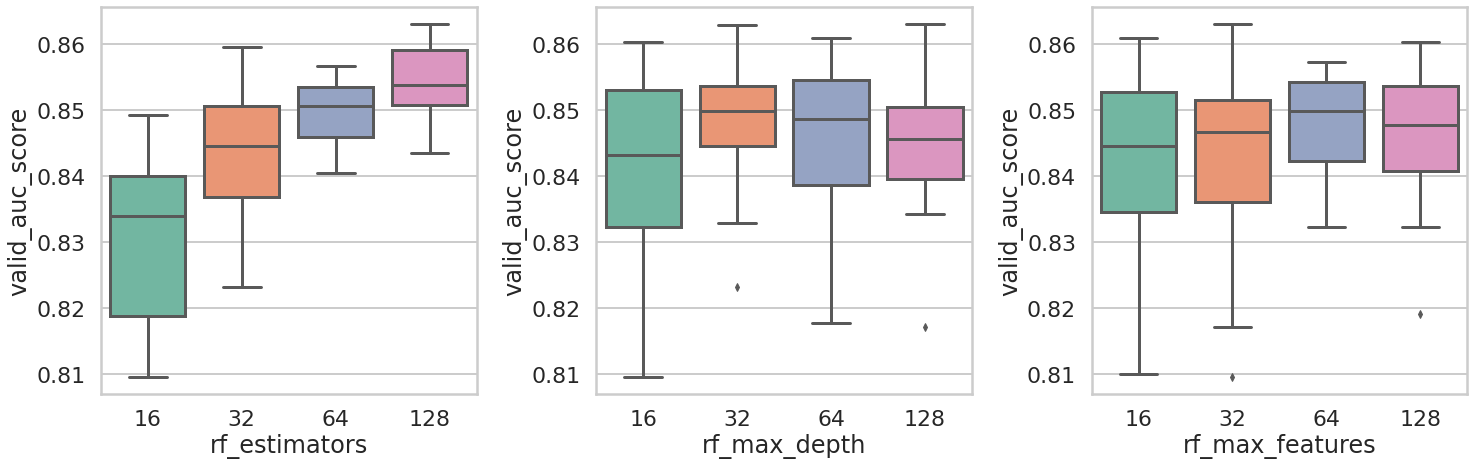

In [ ]:

fig, ax = plt.subplots(1,3,figsize=(21,7))
sns.boxplot(data=perf_df, x="rf_estimators", y="valid_auc_score", ax=ax[0])
sns.boxplot(data=perf_df, x="rf_max_depth", y="valid_auc_score", ax=ax[1])
sns.boxplot(data=perf_df, x="rf_max_features", y="valid_auc_score", ax=ax[2])
fig.tight_layout()

In [ ]:

estimators = [64,100,200,300]
depth=[32,64,128,200]
features=[32,64,128,200]

rfe_list = []
rfd_list = []
rff_list = []
valid_auc_list = []
for rf_estimator in estimators:
    for rf_depth in depth:
        for rf_feature in features:
            params["rf_estimators"] = rf_estimator
            params["rf_max_depth"] = rf_depth
            params["rf_max_features"] = rf_feature
            rfe_list.append(rf_estimator)
            rfd_list.append(rf_depth)
            rff_list.append(rf_feature)
            tp = parse.wrapper(params)
            pl = mp.ModelPipeline(tp)
            pl.train_model()
            pred_data = pl.model_wrapper.get_perf_data(subset="valid", epoch_label="best")
            pred_results = pred_data.get_prediction_results()
            valid_auc = pred_results['roc_auc_score']
            valid_auc_list.append(valid_auc)
            print(f"rf_estimators: {rf_estimator}, rf_max_depth: {rf_depth}, rf_max_features: {rf_feature}, valid_auc: {valid_auc}")

number of features: 1024


2021-04-28 06:34:00,542 Previous dataset split restored
2021-04-28 06:34:02,778 Wrote model metadata to file ampl_output/HTR2A_cur/RF_ecfp_scaffold_classification/5f192c98-6ad5-41c9-8168-c9444c3b7ebe/model_metadata.json
2021-04-28 06:34:02,823 Wrote model metrics to file ampl_output/HTR2A_cur/RF_ecfp_scaffold_classification/5f192c98-6ad5-41c9-8168-c9444c3b7ebe/model_metrics.json


Wrote model tarball to ampl_output/HTR2A_cur_model_5f192c98-6ad5-41c9-8168-c9444c3b7ebe.tar.gz
rf_estimators: 64, rf_max_depth: 32, rf_max_features: 32, valid_auc: 0.8561959937156324
number of features: 1024


2021-04-28 06:34:17,313 Previous dataset split restored
2021-04-28 06:34:19,872 Wrote model metadata to file ampl_output/HTR2A_cur/RF_ecfp_scaffold_classification/20957f70-277c-49ea-ac9a-fcddcbe4a84d/model_metadata.json
2021-04-28 06:34:19,913 Wrote model metrics to file ampl_output/HTR2A_cur/RF_ecfp_scaffold_classification/20957f70-277c-49ea-ac9a-fcddcbe4a84d/model_metrics.json


Wrote model tarball to ampl_output/HTR2A_cur_model_20957f70-277c-49ea-ac9a-fcddcbe4a84d.tar.gz
rf_estimators: 64, rf_max_depth: 32, rf_max_features: 64, valid_auc: 0.8498134328358209
number of features: 1024


2021-04-28 06:34:34,378 Previous dataset split restored
2021-04-28 06:34:37,390 Wrote model metadata to file ampl_output/HTR2A_cur/RF_ecfp_scaffold_classification/eae45eb9-b7bc-43ea-b7d5-73777bfd2a3f/model_metadata.json
2021-04-28 06:34:37,425 Wrote model metrics to file ampl_output/HTR2A_cur/RF_ecfp_scaffold_classification/eae45eb9-b7bc-43ea-b7d5-73777bfd2a3f/model_metrics.json


Wrote model tarball to ampl_output/HTR2A_cur_model_eae45eb9-b7bc-43ea-b7d5-73777bfd2a3f.tar.gz
rf_estimators: 64, rf_max_depth: 32, rf_max_features: 128, valid_auc: 0.8542566771406128
number of features: 1024


2021-04-28 06:34:51,839 Previous dataset split restored
2021-04-28 06:34:55,443 Wrote model metadata to file ampl_output/HTR2A_cur/RF_ecfp_scaffold_classification/e1f9e351-dd0a-4447-b238-e81275a42264/model_metadata.json
2021-04-28 06:34:55,479 Wrote model metrics to file ampl_output/HTR2A_cur/RF_ecfp_scaffold_classification/e1f9e351-dd0a-4447-b238-e81275a42264/model_metrics.json


Wrote model tarball to ampl_output/HTR2A_cur_model_e1f9e351-dd0a-4447-b238-e81275a42264.tar.gz
rf_estimators: 64, rf_max_depth: 32, rf_max_features: 200, valid_auc: 0.8469412804399057
number of features: 1024


2021-04-28 06:35:09,804 Previous dataset split restored
2021-04-28 06:35:12,040 Wrote model metadata to file ampl_output/HTR2A_cur/RF_ecfp_scaffold_classification/00a45bf4-7617-4803-8bf1-a186bb4dbcab/model_metadata.json
2021-04-28 06:35:12,088 Wrote model metrics to file ampl_output/HTR2A_cur/RF_ecfp_scaffold_classification/00a45bf4-7617-4803-8bf1-a186bb4dbcab/model_metrics.json


Wrote model tarball to ampl_output/HTR2A_cur_model_00a45bf4-7617-4803-8bf1-a186bb4dbcab.tar.gz
rf_estimators: 64, rf_max_depth: 64, rf_max_features: 32, valid_auc: 0.8540848389630794
number of features: 1024


2021-04-28 06:35:26,536 Previous dataset split restored
2021-04-28 06:35:29,052 Wrote model metadata to file ampl_output/HTR2A_cur/RF_ecfp_scaffold_classification/cd6bfcd6-381a-440e-8ebe-27f412243ffc/model_metadata.json
2021-04-28 06:35:29,095 Wrote model metrics to file ampl_output/HTR2A_cur/RF_ecfp_scaffold_classification/cd6bfcd6-381a-440e-8ebe-27f412243ffc/model_metrics.json


Wrote model tarball to ampl_output/HTR2A_cur_model_cd6bfcd6-381a-440e-8ebe-27f412243ffc.tar.gz
rf_estimators: 64, rf_max_depth: 64, rf_max_features: 64, valid_auc: 0.8458366064414768
number of features: 1024


2021-04-28 06:35:43,545 Previous dataset split restored
2021-04-28 06:35:46,666 Wrote model metadata to file ampl_output/HTR2A_cur/RF_ecfp_scaffold_classification/c2ddb8f0-d8df-43df-9856-04383601a17c/model_metadata.json
2021-04-28 06:35:46,705 Wrote model metrics to file ampl_output/HTR2A_cur/RF_ecfp_scaffold_classification/c2ddb8f0-d8df-43df-9856-04383601a17c/model_metrics.json


Wrote model tarball to ampl_output/HTR2A_cur_model_c2ddb8f0-d8df-43df-9856-04383601a17c.tar.gz
rf_estimators: 64, rf_max_depth: 64, rf_max_features: 128, valid_auc: 0.8491997250589159
number of features: 1024


2021-04-28 06:36:01,030 Previous dataset split restored
2021-04-28 06:36:04,731 Wrote model metadata to file ampl_output/HTR2A_cur/RF_ecfp_scaffold_classification/b29ac2b8-fdcc-47cc-8a05-bae85e10f6d6/model_metadata.json
2021-04-28 06:36:04,769 Wrote model metrics to file ampl_output/HTR2A_cur/RF_ecfp_scaffold_classification/b29ac2b8-fdcc-47cc-8a05-bae85e10f6d6/model_metrics.json


Wrote model tarball to ampl_output/HTR2A_cur_model_b29ac2b8-fdcc-47cc-8a05-bae85e10f6d6.tar.gz
rf_estimators: 64, rf_max_depth: 64, rf_max_features: 200, valid_auc: 0.8438972898664573
number of features: 1024


2021-04-28 06:36:19,041 Previous dataset split restored
2021-04-28 06:36:21,264 Wrote model metadata to file ampl_output/HTR2A_cur/RF_ecfp_scaffold_classification/b4e87241-90d6-430a-8def-493c8c41440d/model_metadata.json
2021-04-28 06:36:21,313 Wrote model metrics to file ampl_output/HTR2A_cur/RF_ecfp_scaffold_classification/b4e87241-90d6-430a-8def-493c8c41440d/model_metrics.json


Wrote model tarball to ampl_output/HTR2A_cur_model_b4e87241-90d6-430a-8def-493c8c41440d.tar.gz
rf_estimators: 64, rf_max_depth: 128, rf_max_features: 32, valid_auc: 0.8487087588373919
number of features: 1024


2021-04-28 06:36:35,599 Previous dataset split restored
2021-04-28 06:36:38,012 Wrote model metadata to file ampl_output/HTR2A_cur/RF_ecfp_scaffold_classification/ce76b0d2-e1f0-45b4-852f-912b14ee0227/model_metadata.json
2021-04-28 06:36:38,057 Wrote model metrics to file ampl_output/HTR2A_cur/RF_ecfp_scaffold_classification/ce76b0d2-e1f0-45b4-852f-912b14ee0227/model_metrics.json


Wrote model tarball to ampl_output/HTR2A_cur_model_ce76b0d2-e1f0-45b4-852f-912b14ee0227.tar.gz
rf_estimators: 64, rf_max_depth: 128, rf_max_features: 64, valid_auc: 0.8468185388845249
number of features: 1024


2021-04-28 06:36:52,422 Previous dataset split restored
2021-04-28 06:36:55,447 Wrote model metadata to file ampl_output/HTR2A_cur/RF_ecfp_scaffold_classification/58595203-8791-4689-bb42-f1343a170a9e/model_metadata.json
2021-04-28 06:36:55,486 Wrote model metrics to file ampl_output/HTR2A_cur/RF_ecfp_scaffold_classification/58595203-8791-4689-bb42-f1343a170a9e/model_metrics.json


Wrote model tarball to ampl_output/HTR2A_cur_model_58595203-8791-4689-bb42-f1343a170a9e.tar.gz
rf_estimators: 64, rf_max_depth: 128, rf_max_features: 128, valid_auc: 0.8567115082482325
number of features: 1024


2021-04-28 06:37:09,993 Previous dataset split restored
2021-04-28 06:37:13,616 Wrote model metadata to file ampl_output/HTR2A_cur/RF_ecfp_scaffold_classification/0c5c5f8d-1638-493d-8732-47c4f0d7ebb6/model_metadata.json
2021-04-28 06:37:13,651 Wrote model metrics to file ampl_output/HTR2A_cur/RF_ecfp_scaffold_classification/0c5c5f8d-1638-493d-8732-47c4f0d7ebb6/model_metrics.json


Wrote model tarball to ampl_output/HTR2A_cur_model_0c5c5f8d-1638-493d-8732-47c4f0d7ebb6.tar.gz
rf_estimators: 64, rf_max_depth: 128, rf_max_features: 200, valid_auc: 0.8522928122545169
number of features: 1024


2021-04-28 06:37:28,089 Previous dataset split restored
2021-04-28 06:37:30,349 Wrote model metadata to file ampl_output/HTR2A_cur/RF_ecfp_scaffold_classification/3946c56c-1756-49c0-aeaa-864a3c3b7267/model_metadata.json
2021-04-28 06:37:30,398 Wrote model metrics to file ampl_output/HTR2A_cur/RF_ecfp_scaffold_classification/3946c56c-1756-49c0-aeaa-864a3c3b7267/model_metrics.json


Wrote model tarball to ampl_output/HTR2A_cur_model_3946c56c-1756-49c0-aeaa-864a3c3b7267.tar.gz
rf_estimators: 64, rf_max_depth: 200, rf_max_features: 32, valid_auc: 0.8468185388845247
number of features: 1024


2021-04-28 06:37:44,808 Previous dataset split restored
2021-04-28 06:37:47,244 Wrote model metadata to file ampl_output/HTR2A_cur/RF_ecfp_scaffold_classification/5212395d-7d0a-4636-8670-5fe9499df1e4/model_metadata.json
2021-04-28 06:37:47,290 Wrote model metrics to file ampl_output/HTR2A_cur/RF_ecfp_scaffold_classification/5212395d-7d0a-4636-8670-5fe9499df1e4/model_metrics.json


Wrote model tarball to ampl_output/HTR2A_cur_model_5212395d-7d0a-4636-8670-5fe9499df1e4.tar.gz
rf_estimators: 64, rf_max_depth: 200, rf_max_features: 64, valid_auc: 0.8647879025923016
number of features: 1024


2021-04-28 06:38:01,709 Previous dataset split restored
2021-04-28 06:38:04,725 Wrote model metadata to file ampl_output/HTR2A_cur/RF_ecfp_scaffold_classification/fbedf2c0-edb6-4bff-a927-f711a55761c5/model_metadata.json
2021-04-28 06:38:04,763 Wrote model metrics to file ampl_output/HTR2A_cur/RF_ecfp_scaffold_classification/fbedf2c0-edb6-4bff-a927-f711a55761c5/model_metrics.json


Wrote model tarball to ampl_output/HTR2A_cur_model_fbedf2c0-edb6-4bff-a927-f711a55761c5.tar.gz
rf_estimators: 64, rf_max_depth: 200, rf_max_features: 128, valid_auc: 0.8488805970149252
number of features: 1024


2021-04-28 06:38:19,178 Previous dataset split restored
2021-04-28 06:38:22,890 Wrote model metadata to file ampl_output/HTR2A_cur/RF_ecfp_scaffold_classification/9a6ed8a3-5dc7-481a-aa7c-3d5b391ea13a/model_metadata.json
2021-04-28 06:38:22,929 Wrote model metrics to file ampl_output/HTR2A_cur/RF_ecfp_scaffold_classification/9a6ed8a3-5dc7-481a-aa7c-3d5b391ea13a/model_metrics.json


Wrote model tarball to ampl_output/HTR2A_cur_model_9a6ed8a3-5dc7-481a-aa7c-3d5b391ea13a.tar.gz
rf_estimators: 64, rf_max_depth: 200, rf_max_features: 200, valid_auc: 0.8514581696779262
number of features: 1024


2021-04-28 06:38:37,323 Previous dataset split restored
2021-04-28 06:38:39,918 Wrote model metadata to file ampl_output/HTR2A_cur/RF_ecfp_scaffold_classification/9ba7cae5-0d73-46a6-a11d-13142e248490/model_metadata.json
2021-04-28 06:38:39,981 Wrote model metrics to file ampl_output/HTR2A_cur/RF_ecfp_scaffold_classification/9ba7cae5-0d73-46a6-a11d-13142e248490/model_metrics.json


Wrote model tarball to ampl_output/HTR2A_cur_model_9ba7cae5-0d73-46a6-a11d-13142e248490.tar.gz
rf_estimators: 100, rf_max_depth: 32, rf_max_features: 32, valid_auc: 0.8594363707776905
number of features: 1024


2021-04-28 06:38:54,298 Previous dataset split restored
2021-04-28 06:38:57,277 Wrote model metadata to file ampl_output/HTR2A_cur/RF_ecfp_scaffold_classification/5b2e86fb-5a57-4d16-8a25-eb2abcc49024/model_metadata.json
2021-04-28 06:38:57,337 Wrote model metrics to file ampl_output/HTR2A_cur/RF_ecfp_scaffold_classification/5b2e86fb-5a57-4d16-8a25-eb2abcc49024/model_metrics.json


Wrote model tarball to ampl_output/HTR2A_cur_model_5b2e86fb-5a57-4d16-8a25-eb2abcc49024.tar.gz
rf_estimators: 100, rf_max_depth: 32, rf_max_features: 64, valid_auc: 0.8542812254516889
number of features: 1024


2021-04-28 06:39:11,699 Previous dataset split restored
2021-04-28 06:39:15,487 Wrote model metadata to file ampl_output/HTR2A_cur/RF_ecfp_scaffold_classification/81bce523-3c44-475f-a524-427b22035f81/model_metadata.json
2021-04-28 06:39:15,541 Wrote model metrics to file ampl_output/HTR2A_cur/RF_ecfp_scaffold_classification/81bce523-3c44-475f-a524-427b22035f81/model_metrics.json


Wrote model tarball to ampl_output/HTR2A_cur_model_81bce523-3c44-475f-a524-427b22035f81.tar.gz
rf_estimators: 100, rf_max_depth: 32, rf_max_features: 128, valid_auc: 0.8516791044776121
number of features: 1024


2021-04-28 06:39:30,012 Previous dataset split restored
2021-04-28 06:39:34,779 Wrote model metadata to file ampl_output/HTR2A_cur/RF_ecfp_scaffold_classification/b40bab6b-d4e0-4b10-880d-fdb26467da7b/model_metadata.json
2021-04-28 06:39:34,830 Wrote model metrics to file ampl_output/HTR2A_cur/RF_ecfp_scaffold_classification/b40bab6b-d4e0-4b10-880d-fdb26467da7b/model_metrics.json


Wrote model tarball to ampl_output/HTR2A_cur_model_b40bab6b-d4e0-4b10-880d-fdb26467da7b.tar.gz
rf_estimators: 100, rf_max_depth: 32, rf_max_features: 200, valid_auc: 0.8493470149253731
number of features: 1024


2021-04-28 06:39:49,236 Previous dataset split restored
2021-04-28 06:39:51,873 Wrote model metadata to file ampl_output/HTR2A_cur/RF_ecfp_scaffold_classification/04a55c8b-d908-42a4-923f-1f4b301adb68/model_metadata.json
2021-04-28 06:39:51,951 Wrote model metrics to file ampl_output/HTR2A_cur/RF_ecfp_scaffold_classification/04a55c8b-d908-42a4-923f-1f4b301adb68/model_metrics.json


Wrote model tarball to ampl_output/HTR2A_cur_model_04a55c8b-d908-42a4-923f-1f4b301adb68.tar.gz
rf_estimators: 100, rf_max_depth: 64, rf_max_features: 32, valid_auc: 0.852562843676355
number of features: 1024


2021-04-28 06:40:06,300 Previous dataset split restored
2021-04-28 06:40:09,398 Wrote model metadata to file ampl_output/HTR2A_cur/RF_ecfp_scaffold_classification/2f6163dc-6185-4962-8df4-64f320e6afab/model_metadata.json
2021-04-28 06:40:09,462 Wrote model metrics to file ampl_output/HTR2A_cur/RF_ecfp_scaffold_classification/2f6163dc-6185-4962-8df4-64f320e6afab/model_metrics.json


Wrote model tarball to ampl_output/HTR2A_cur_model_2f6163dc-6185-4962-8df4-64f320e6afab.tar.gz
rf_estimators: 100, rf_max_depth: 64, rf_max_features: 64, valid_auc: 0.8513354281225451
number of features: 1024


2021-04-28 06:40:23,900 Previous dataset split restored
2021-04-28 06:40:27,884 Wrote model metadata to file ampl_output/HTR2A_cur/RF_ecfp_scaffold_classification/a5fe6811-0295-4eb5-9347-fce07e58877f/model_metadata.json
2021-04-28 06:40:27,942 Wrote model metrics to file ampl_output/HTR2A_cur/RF_ecfp_scaffold_classification/a5fe6811-0295-4eb5-9347-fce07e58877f/model_metrics.json


Wrote model tarball to ampl_output/HTR2A_cur_model_a5fe6811-0295-4eb5-9347-fce07e58877f.tar.gz
rf_estimators: 100, rf_max_depth: 64, rf_max_features: 128, valid_auc: 0.8463275726630008
number of features: 1024


2021-04-28 06:40:42,329 Previous dataset split restored
2021-04-28 06:40:47,329 Wrote model metadata to file ampl_output/HTR2A_cur/RF_ecfp_scaffold_classification/d340a1ac-3fc0-4439-a3b3-94887915bd49/model_metadata.json
2021-04-28 06:40:47,381 Wrote model metrics to file ampl_output/HTR2A_cur/RF_ecfp_scaffold_classification/d340a1ac-3fc0-4439-a3b3-94887915bd49/model_metrics.json


Wrote model tarball to ampl_output/HTR2A_cur_model_d340a1ac-3fc0-4439-a3b3-94887915bd49.tar.gz
rf_estimators: 100, rf_max_depth: 64, rf_max_features: 200, valid_auc: 0.8572270227808327
number of features: 1024


2021-04-28 06:41:01,801 Previous dataset split restored
2021-04-28 06:41:04,434 Wrote model metadata to file ampl_output/HTR2A_cur/RF_ecfp_scaffold_classification/17c1425a-e82f-460a-b3f3-4faada3e2614/model_metadata.json
2021-04-28 06:41:04,509 Wrote model metrics to file ampl_output/HTR2A_cur/RF_ecfp_scaffold_classification/17c1425a-e82f-460a-b3f3-4faada3e2614/model_metrics.json


Wrote model tarball to ampl_output/HTR2A_cur_model_17c1425a-e82f-460a-b3f3-4faada3e2614.tar.gz
rf_estimators: 100, rf_max_depth: 128, rf_max_features: 32, valid_auc: 0.8502798507462687
number of features: 1024


2021-04-28 06:41:18,947 Previous dataset split restored
2021-04-28 06:41:21,959 Wrote model metadata to file ampl_output/HTR2A_cur/RF_ecfp_scaffold_classification/bb6d6176-e80d-4ca6-bf58-125f9010546b/model_metadata.json
2021-04-28 06:41:22,028 Wrote model metrics to file ampl_output/HTR2A_cur/RF_ecfp_scaffold_classification/bb6d6176-e80d-4ca6-bf58-125f9010546b/model_metrics.json


Wrote model tarball to ampl_output/HTR2A_cur_model_bb6d6176-e80d-4ca6-bf58-125f9010546b.tar.gz
rf_estimators: 100, rf_max_depth: 128, rf_max_features: 64, valid_auc: 0.8486351139041634
number of features: 1024


2021-04-28 06:41:36,475 Previous dataset split restored
2021-04-28 06:41:40,467 Wrote model metadata to file ampl_output/HTR2A_cur/RF_ecfp_scaffold_classification/38123c84-58f1-4902-aa79-04b397d0058b/model_metadata.json
2021-04-28 06:41:40,523 Wrote model metrics to file ampl_output/HTR2A_cur/RF_ecfp_scaffold_classification/38123c84-58f1-4902-aa79-04b397d0058b/model_metrics.json


Wrote model tarball to ampl_output/HTR2A_cur_model_38123c84-58f1-4902-aa79-04b397d0058b.tar.gz
rf_estimators: 100, rf_max_depth: 128, rf_max_features: 128, valid_auc: 0.8526610369206599
number of features: 1024


2021-04-28 06:41:55,041 Previous dataset split restored
2021-04-28 06:41:59,925 Wrote model metadata to file ampl_output/HTR2A_cur/RF_ecfp_scaffold_classification/ce9e1967-5d33-4203-99e5-28d0f8e41e59/model_metadata.json
2021-04-28 06:41:59,979 Wrote model metrics to file ampl_output/HTR2A_cur/RF_ecfp_scaffold_classification/ce9e1967-5d33-4203-99e5-28d0f8e41e59/model_metrics.json


Wrote model tarball to ampl_output/HTR2A_cur_model_ce9e1967-5d33-4203-99e5-28d0f8e41e59.tar.gz
rf_estimators: 100, rf_max_depth: 128, rf_max_features: 200, valid_auc: 0.8496415946582876
number of features: 1024


2021-04-28 06:42:14,347 Previous dataset split restored
2021-04-28 06:42:16,958 Wrote model metadata to file ampl_output/HTR2A_cur/RF_ecfp_scaffold_classification/d91ca1c5-db32-4f84-b196-e4b247a48830/model_metadata.json
2021-04-28 06:42:17,033 Wrote model metrics to file ampl_output/HTR2A_cur/RF_ecfp_scaffold_classification/d91ca1c5-db32-4f84-b196-e4b247a48830/model_metrics.json


Wrote model tarball to ampl_output/HTR2A_cur_model_d91ca1c5-db32-4f84-b196-e4b247a48830.tar.gz
rf_estimators: 100, rf_max_depth: 200, rf_max_features: 32, valid_auc: 0.8578652788688138
number of features: 1024


2021-04-28 06:42:33,829 Previous dataset split restored
2021-04-28 06:42:37,739 Wrote model metadata to file ampl_output/HTR2A_cur/RF_ecfp_scaffold_classification/c32cfb1e-5150-4728-a23c-4478d130f016/model_metadata.json
2021-04-28 06:42:37,814 Wrote model metrics to file ampl_output/HTR2A_cur/RF_ecfp_scaffold_classification/c32cfb1e-5150-4728-a23c-4478d130f016/model_metrics.json


Wrote model tarball to ampl_output/HTR2A_cur_model_c32cfb1e-5150-4728-a23c-4478d130f016.tar.gz
rf_estimators: 100, rf_max_depth: 200, rf_max_features: 64, valid_auc: 0.8525137470542027
number of features: 1024


2021-04-28 06:42:52,949 Previous dataset split restored
2021-04-28 06:42:56,942 Wrote model metadata to file ampl_output/HTR2A_cur/RF_ecfp_scaffold_classification/f7c5d7d3-fe72-4e88-8b63-4b847eaf2ea6/model_metadata.json
2021-04-28 06:42:56,999 Wrote model metrics to file ampl_output/HTR2A_cur/RF_ecfp_scaffold_classification/f7c5d7d3-fe72-4e88-8b63-4b847eaf2ea6/model_metrics.json


Wrote model tarball to ampl_output/HTR2A_cur_model_f7c5d7d3-fe72-4e88-8b63-4b847eaf2ea6.tar.gz
rf_estimators: 100, rf_max_depth: 200, rf_max_features: 128, valid_auc: 0.8479968578161823
number of features: 1024


2021-04-28 06:43:11,417 Previous dataset split restored
2021-04-28 06:43:16,500 Wrote model metadata to file ampl_output/HTR2A_cur/RF_ecfp_scaffold_classification/faee0fa0-bb33-49af-9afd-0f563de425b9/model_metadata.json
2021-04-28 06:43:16,555 Wrote model metrics to file ampl_output/HTR2A_cur/RF_ecfp_scaffold_classification/faee0fa0-bb33-49af-9afd-0f563de425b9/model_metrics.json


Wrote model tarball to ampl_output/HTR2A_cur_model_faee0fa0-bb33-49af-9afd-0f563de425b9.tar.gz
rf_estimators: 100, rf_max_depth: 200, rf_max_features: 200, valid_auc: 0.8500589159465828
number of features: 1024


2021-04-28 06:43:31,011 Previous dataset split restored
2021-04-28 06:43:34,698 Wrote model metadata to file ampl_output/HTR2A_cur/RF_ecfp_scaffold_classification/79048a63-2df2-47fe-a8d9-54590344e8b9/model_metadata.json
2021-04-28 06:43:34,830 Wrote model metrics to file ampl_output/HTR2A_cur/RF_ecfp_scaffold_classification/79048a63-2df2-47fe-a8d9-54590344e8b9/model_metrics.json


Wrote model tarball to ampl_output/HTR2A_cur_model_79048a63-2df2-47fe-a8d9-54590344e8b9.tar.gz
rf_estimators: 200, rf_max_depth: 32, rf_max_features: 32, valid_auc: 0.861498428908091
number of features: 1024


2021-04-28 06:43:49,201 Previous dataset split restored
2021-04-28 06:43:53,777 Wrote model metadata to file ampl_output/HTR2A_cur/RF_ecfp_scaffold_classification/cf87904f-20d7-4b50-9541-6ac9aeecb587/model_metadata.json
2021-04-28 06:43:53,890 Wrote model metrics to file ampl_output/HTR2A_cur/RF_ecfp_scaffold_classification/cf87904f-20d7-4b50-9541-6ac9aeecb587/model_metrics.json


Wrote model tarball to ampl_output/HTR2A_cur_model_cf87904f-20d7-4b50-9541-6ac9aeecb587.tar.gz
rf_estimators: 200, rf_max_depth: 32, rf_max_features: 64, valid_auc: 0.8586508248232521
number of features: 1024


2021-04-28 06:44:08,177 Previous dataset split restored
2021-04-28 06:44:14,536 Wrote model metadata to file ampl_output/HTR2A_cur/RF_ecfp_scaffold_classification/4e98d173-ff28-4db5-a4ea-2d70f8195880/model_metadata.json
2021-04-28 06:44:14,636 Wrote model metrics to file ampl_output/HTR2A_cur/RF_ecfp_scaffold_classification/4e98d173-ff28-4db5-a4ea-2d70f8195880/model_metrics.json


Wrote model tarball to ampl_output/HTR2A_cur_model_4e98d173-ff28-4db5-a4ea-2d70f8195880.tar.gz
rf_estimators: 200, rf_max_depth: 32, rf_max_features: 128, valid_auc: 0.858749018067557
number of features: 1024


2021-04-28 06:44:28,982 Previous dataset split restored
2021-04-28 06:44:36,943 Wrote model metadata to file ampl_output/HTR2A_cur/RF_ecfp_scaffold_classification/978703f6-e16e-4652-806f-5d130f0a6026/model_metadata.json
2021-04-28 06:44:37,045 Wrote model metrics to file ampl_output/HTR2A_cur/RF_ecfp_scaffold_classification/978703f6-e16e-4652-806f-5d130f0a6026/model_metrics.json


Wrote model tarball to ampl_output/HTR2A_cur_model_978703f6-e16e-4652-806f-5d130f0a6026.tar.gz
rf_estimators: 200, rf_max_depth: 32, rf_max_features: 200, valid_auc: 0.8579634721131186
number of features: 1024


2021-04-28 06:44:51,451 Previous dataset split restored
2021-04-28 06:44:55,306 Wrote model metadata to file ampl_output/HTR2A_cur/RF_ecfp_scaffold_classification/f21d238f-4c4a-42d9-a7e8-2d918f889b6e/model_metadata.json
2021-04-28 06:44:55,449 Wrote model metrics to file ampl_output/HTR2A_cur/RF_ecfp_scaffold_classification/f21d238f-4c4a-42d9-a7e8-2d918f889b6e/model_metrics.json


Wrote model tarball to ampl_output/HTR2A_cur_model_f21d238f-4c4a-42d9-a7e8-2d918f889b6e.tar.gz
rf_estimators: 200, rf_max_depth: 64, rf_max_features: 32, valid_auc: 0.8539866457187746
number of features: 1024


2021-04-28 06:45:09,859 Previous dataset split restored
2021-04-28 06:45:14,566 Wrote model metadata to file ampl_output/HTR2A_cur/RF_ecfp_scaffold_classification/7fafa195-f10d-4632-a1ae-e124249acb64/model_metadata.json
2021-04-28 06:45:14,694 Wrote model metrics to file ampl_output/HTR2A_cur/RF_ecfp_scaffold_classification/7fafa195-f10d-4632-a1ae-e124249acb64/model_metrics.json


Wrote model tarball to ampl_output/HTR2A_cur_model_7fafa195-f10d-4632-a1ae-e124249acb64.tar.gz
rf_estimators: 200, rf_max_depth: 64, rf_max_features: 64, valid_auc: 0.8569324430479184
number of features: 1024


2021-04-28 06:45:29,197 Previous dataset split restored
2021-04-28 06:45:35,774 Wrote model metadata to file ampl_output/HTR2A_cur/RF_ecfp_scaffold_classification/1cf50e06-7b36-4210-87df-bc626fbffd09/model_metadata.json
2021-04-28 06:45:35,880 Wrote model metrics to file ampl_output/HTR2A_cur/RF_ecfp_scaffold_classification/1cf50e06-7b36-4210-87df-bc626fbffd09/model_metrics.json


Wrote model tarball to ampl_output/HTR2A_cur_model_1cf50e06-7b36-4210-87df-bc626fbffd09.tar.gz
rf_estimators: 200, rf_max_depth: 64, rf_max_features: 128, valid_auc: 0.8547230950510605
number of features: 1024


2021-04-28 06:45:50,348 Previous dataset split restored
2021-04-28 06:45:59,004 Wrote model metadata to file ampl_output/HTR2A_cur/RF_ecfp_scaffold_classification/e187805e-ade5-4b21-b97d-7e0020154c8e/model_metadata.json
2021-04-28 06:45:59,109 Wrote model metrics to file ampl_output/HTR2A_cur/RF_ecfp_scaffold_classification/e187805e-ade5-4b21-b97d-7e0020154c8e/model_metrics.json


Wrote model tarball to ampl_output/HTR2A_cur_model_e187805e-ade5-4b21-b97d-7e0020154c8e.tar.gz
rf_estimators: 200, rf_max_depth: 64, rf_max_features: 200, valid_auc: 0.8519736842105263
number of features: 1024


2021-04-28 06:46:13,492 Previous dataset split restored
2021-04-28 06:46:17,321 Wrote model metadata to file ampl_output/HTR2A_cur/RF_ecfp_scaffold_classification/5611167a-ed16-4aad-bdbd-75c3d4304a95/model_metadata.json
2021-04-28 06:46:17,465 Wrote model metrics to file ampl_output/HTR2A_cur/RF_ecfp_scaffold_classification/5611167a-ed16-4aad-bdbd-75c3d4304a95/model_metrics.json


Wrote model tarball to ampl_output/HTR2A_cur_model_5611167a-ed16-4aad-bdbd-75c3d4304a95.tar.gz
rf_estimators: 200, rf_max_depth: 128, rf_max_features: 32, valid_auc: 0.8567115082482326
number of features: 1024


2021-04-28 06:46:31,872 Previous dataset split restored
2021-04-28 06:46:36,572 Wrote model metadata to file ampl_output/HTR2A_cur/RF_ecfp_scaffold_classification/8cd36ca2-5183-498f-8b5c-9be74bf18a4d/model_metadata.json
2021-04-28 06:46:36,702 Wrote model metrics to file ampl_output/HTR2A_cur/RF_ecfp_scaffold_classification/8cd36ca2-5183-498f-8b5c-9be74bf18a4d/model_metrics.json


Wrote model tarball to ampl_output/HTR2A_cur_model_8cd36ca2-5183-498f-8b5c-9be74bf18a4d.tar.gz
rf_estimators: 200, rf_max_depth: 128, rf_max_features: 64, valid_auc: 0.8574725058915947
number of features: 1024


2021-04-28 06:46:51,100 Previous dataset split restored
2021-04-28 06:46:57,555 Wrote model metadata to file ampl_output/HTR2A_cur/RF_ecfp_scaffold_classification/7c97388c-e498-44ff-8b00-bdb00c453936/model_metadata.json
2021-04-28 06:46:57,662 Wrote model metrics to file ampl_output/HTR2A_cur/RF_ecfp_scaffold_classification/7c97388c-e498-44ff-8b00-bdb00c453936/model_metrics.json


Wrote model tarball to ampl_output/HTR2A_cur_model_7c97388c-e498-44ff-8b00-bdb00c453936.tar.gz
rf_estimators: 200, rf_max_depth: 128, rf_max_features: 128, valid_auc: 0.852317360565593
number of features: 1024


2021-04-28 06:47:12,017 Previous dataset split restored
2021-04-28 06:47:20,577 Wrote model metadata to file ampl_output/HTR2A_cur/RF_ecfp_scaffold_classification/c82b6d28-41b0-4d4e-a161-cab4a504f322/model_metadata.json
2021-04-28 06:47:20,679 Wrote model metrics to file ampl_output/HTR2A_cur/RF_ecfp_scaffold_classification/c82b6d28-41b0-4d4e-a161-cab4a504f322/model_metrics.json


Wrote model tarball to ampl_output/HTR2A_cur_model_c82b6d28-41b0-4d4e-a161-cab4a504f322.tar.gz
rf_estimators: 200, rf_max_depth: 128, rf_max_features: 200, valid_auc: 0.8409023959151611
number of features: 1024


2021-04-28 06:47:35,130 Previous dataset split restored
2021-04-28 06:47:38,957 Wrote model metadata to file ampl_output/HTR2A_cur/RF_ecfp_scaffold_classification/7083ad79-e79b-4fc9-9ba9-50998421bdd3/model_metadata.json
2021-04-28 06:47:39,102 Wrote model metrics to file ampl_output/HTR2A_cur/RF_ecfp_scaffold_classification/7083ad79-e79b-4fc9-9ba9-50998421bdd3/model_metrics.json


Wrote model tarball to ampl_output/HTR2A_cur_model_7083ad79-e79b-4fc9-9ba9-50998421bdd3.tar.gz
rf_estimators: 200, rf_max_depth: 200, rf_max_features: 32, valid_auc: 0.8571288295365279
number of features: 1024


2021-04-28 06:47:53,483 Previous dataset split restored
2021-04-28 06:47:58,314 Wrote model metadata to file ampl_output/HTR2A_cur/RF_ecfp_scaffold_classification/ce414a2f-19f3-477d-88b5-cc78ab7d0e57/model_metadata.json
2021-04-28 06:47:58,439 Wrote model metrics to file ampl_output/HTR2A_cur/RF_ecfp_scaffold_classification/ce414a2f-19f3-477d-88b5-cc78ab7d0e57/model_metrics.json


Wrote model tarball to ampl_output/HTR2A_cur_model_ce414a2f-19f3-477d-88b5-cc78ab7d0e57.tar.gz
rf_estimators: 200, rf_max_depth: 200, rf_max_features: 64, valid_auc: 0.8571779261586803
number of features: 1024


2021-04-28 06:48:12,817 Previous dataset split restored
2021-04-28 06:48:19,206 Wrote model metadata to file ampl_output/HTR2A_cur/RF_ecfp_scaffold_classification/94d52f40-3c18-456c-bd7b-d5967ca31ac3/model_metadata.json
2021-04-28 06:48:19,323 Wrote model metrics to file ampl_output/HTR2A_cur/RF_ecfp_scaffold_classification/94d52f40-3c18-456c-bd7b-d5967ca31ac3/model_metrics.json


Wrote model tarball to ampl_output/HTR2A_cur_model_94d52f40-3c18-456c-bd7b-d5967ca31ac3.tar.gz
rf_estimators: 200, rf_max_depth: 200, rf_max_features: 128, valid_auc: 0.8527101335428122
number of features: 1024


2021-04-28 06:48:33,735 Previous dataset split restored
2021-04-28 06:48:42,008 Wrote model metadata to file ampl_output/HTR2A_cur/RF_ecfp_scaffold_classification/021fd73c-4e0d-4f37-bdb8-57b0a5ff0a8d/model_metadata.json
2021-04-28 06:48:42,109 Wrote model metrics to file ampl_output/HTR2A_cur/RF_ecfp_scaffold_classification/021fd73c-4e0d-4f37-bdb8-57b0a5ff0a8d/model_metrics.json


Wrote model tarball to ampl_output/HTR2A_cur_model_021fd73c-4e0d-4f37-bdb8-57b0a5ff0a8d.tar.gz
rf_estimators: 200, rf_max_depth: 200, rf_max_features: 200, valid_auc: 0.8520718774548312
number of features: 1024


2021-04-28 06:48:56,616 Previous dataset split restored
2021-04-28 06:49:01,805 Wrote model metadata to file ampl_output/HTR2A_cur/RF_ecfp_scaffold_classification/e3371b2d-06ca-4b14-bfda-6adf58ac020e/model_metadata.json
2021-04-28 06:49:01,988 Wrote model metrics to file ampl_output/HTR2A_cur/RF_ecfp_scaffold_classification/e3371b2d-06ca-4b14-bfda-6adf58ac020e/model_metrics.json


Wrote model tarball to ampl_output/HTR2A_cur_model_e3371b2d-06ca-4b14-bfda-6adf58ac020e.tar.gz
rf_estimators: 300, rf_max_depth: 32, rf_max_features: 32, valid_auc: 0.8595836606441476
number of features: 1024


2021-04-28 06:49:16,585 Previous dataset split restored
2021-04-28 06:49:22,939 Wrote model metadata to file ampl_output/HTR2A_cur/RF_ecfp_scaffold_classification/6d11c75e-4fd4-4733-bc5c-cc5d408988d1/model_metadata.json
2021-04-28 06:49:23,111 Wrote model metrics to file ampl_output/HTR2A_cur/RF_ecfp_scaffold_classification/6d11c75e-4fd4-4733-bc5c-cc5d408988d1/model_metrics.json


Wrote model tarball to ampl_output/HTR2A_cur_model_6d11c75e-4fd4-4733-bc5c-cc5d408988d1.tar.gz
rf_estimators: 300, rf_max_depth: 32, rf_max_features: 64, valid_auc: 0.8572270227808326
number of features: 1024


2021-04-28 06:49:37,610 Previous dataset split restored
2021-04-28 06:49:46,787 Wrote model metadata to file ampl_output/HTR2A_cur/RF_ecfp_scaffold_classification/d9895191-5ef8-4126-b549-6ccf78ad5a52/model_metadata.json
2021-04-28 06:49:46,935 Wrote model metrics to file ampl_output/HTR2A_cur/RF_ecfp_scaffold_classification/d9895191-5ef8-4126-b549-6ccf78ad5a52/model_metrics.json


Wrote model tarball to ampl_output/HTR2A_cur_model_d9895191-5ef8-4126-b549-6ccf78ad5a52.tar.gz
rf_estimators: 300, rf_max_depth: 32, rf_max_features: 128, valid_auc: 0.8555086410054988
number of features: 1024


2021-04-28 06:50:01,560 Previous dataset split restored
2021-04-28 06:50:13,417 Wrote model metadata to file ampl_output/HTR2A_cur/RF_ecfp_scaffold_classification/b5f3074f-c9c7-40ae-9b28-f8c0fa8ffbcf/model_metadata.json
2021-04-28 06:50:13,554 Wrote model metrics to file ampl_output/HTR2A_cur/RF_ecfp_scaffold_classification/b5f3074f-c9c7-40ae-9b28-f8c0fa8ffbcf/model_metrics.json


Wrote model tarball to ampl_output/HTR2A_cur_model_b5f3074f-c9c7-40ae-9b28-f8c0fa8ffbcf.tar.gz
rf_estimators: 300, rf_max_depth: 32, rf_max_features: 200, valid_auc: 0.8579634721131185
number of features: 1024


2021-04-28 06:50:28,001 Previous dataset split restored
2021-04-28 06:50:33,038 Wrote model metadata to file ampl_output/HTR2A_cur/RF_ecfp_scaffold_classification/1e28b430-2a14-4376-bbfb-a5846ffefd96/model_metadata.json
2021-04-28 06:50:33,246 Wrote model metrics to file ampl_output/HTR2A_cur/RF_ecfp_scaffold_classification/1e28b430-2a14-4376-bbfb-a5846ffefd96/model_metrics.json


Wrote model tarball to ampl_output/HTR2A_cur_model_1e28b430-2a14-4376-bbfb-a5846ffefd96.tar.gz
rf_estimators: 300, rf_max_depth: 64, rf_max_features: 32, valid_auc: 0.8562450903377847
number of features: 1024


2021-04-28 06:50:47,549 Previous dataset split restored
2021-04-28 06:50:53,955 Wrote model metadata to file ampl_output/HTR2A_cur/RF_ecfp_scaffold_classification/cbce3d24-b3f4-4786-a834-a6bfd30e407c/model_metadata.json
2021-04-28 06:50:54,138 Wrote model metrics to file ampl_output/HTR2A_cur/RF_ecfp_scaffold_classification/cbce3d24-b3f4-4786-a834-a6bfd30e407c/model_metrics.json


Wrote model tarball to ampl_output/HTR2A_cur_model_cbce3d24-b3f4-4786-a834-a6bfd30e407c.tar.gz
rf_estimators: 300, rf_max_depth: 64, rf_max_features: 64, valid_auc: 0.8576934406912805
number of features: 1024


2021-04-28 06:51:08,429 Previous dataset split restored
2021-04-28 06:51:17,277 Wrote model metadata to file ampl_output/HTR2A_cur/RF_ecfp_scaffold_classification/f1eb0e51-19ae-4921-8973-ab055988340f/model_metadata.json
2021-04-28 06:51:17,441 Wrote model metrics to file ampl_output/HTR2A_cur/RF_ecfp_scaffold_classification/f1eb0e51-19ae-4921-8973-ab055988340f/model_metrics.json


Wrote model tarball to ampl_output/HTR2A_cur_model_f1eb0e51-19ae-4921-8973-ab055988340f.tar.gz
rf_estimators: 300, rf_max_depth: 64, rf_max_features: 128, valid_auc: 0.852170070699136
number of features: 1024


2021-04-28 06:51:31,794 Previous dataset split restored
2021-04-28 06:51:43,728 Wrote model metadata to file ampl_output/HTR2A_cur/RF_ecfp_scaffold_classification/d8f610fa-1c87-48a5-8cbb-675b2cc05bd8/model_metadata.json
2021-04-28 06:51:43,875 Wrote model metrics to file ampl_output/HTR2A_cur/RF_ecfp_scaffold_classification/d8f610fa-1c87-48a5-8cbb-675b2cc05bd8/model_metrics.json


Wrote model tarball to ampl_output/HTR2A_cur_model_d8f610fa-1c87-48a5-8cbb-675b2cc05bd8.tar.gz
rf_estimators: 300, rf_max_depth: 64, rf_max_features: 200, valid_auc: 0.85614689709348
number of features: 1024


2021-04-28 06:51:58,249 Previous dataset split restored
2021-04-28 06:52:03,385 Wrote model metadata to file ampl_output/HTR2A_cur/RF_ecfp_scaffold_classification/bf675458-6ad2-4007-8502-ce89f8f969fc/model_metadata.json
2021-04-28 06:52:03,592 Wrote model metrics to file ampl_output/HTR2A_cur/RF_ecfp_scaffold_classification/bf675458-6ad2-4007-8502-ce89f8f969fc/model_metrics.json


Wrote model tarball to ampl_output/HTR2A_cur_model_bf675458-6ad2-4007-8502-ce89f8f969fc.tar.gz
rf_estimators: 300, rf_max_depth: 128, rf_max_features: 32, valid_auc: 0.8623821681068342
number of features: 1024


2021-04-28 06:52:17,844 Previous dataset split restored
2021-04-28 06:52:24,365 Wrote model metadata to file ampl_output/HTR2A_cur/RF_ecfp_scaffold_classification/99c0d631-91cf-42c4-816e-0fbdcd31b589/model_metadata.json
2021-04-28 06:52:24,548 Wrote model metrics to file ampl_output/HTR2A_cur/RF_ecfp_scaffold_classification/99c0d631-91cf-42c4-816e-0fbdcd31b589/model_metrics.json


Wrote model tarball to ampl_output/HTR2A_cur_model_99c0d631-91cf-42c4-816e-0fbdcd31b589.tar.gz
rf_estimators: 300, rf_max_depth: 128, rf_max_features: 64, valid_auc: 0.8619648468185389
number of features: 1024


2021-04-28 06:52:38,946 Previous dataset split restored
2021-04-28 06:52:48,207 Wrote model metadata to file ampl_output/HTR2A_cur/RF_ecfp_scaffold_classification/7c613eb0-3348-4bc5-923a-85f83d4cc960/model_metadata.json
2021-04-28 06:52:48,363 Wrote model metrics to file ampl_output/HTR2A_cur/RF_ecfp_scaffold_classification/7c613eb0-3348-4bc5-923a-85f83d4cc960/model_metrics.json


Wrote model tarball to ampl_output/HTR2A_cur_model_7c613eb0-3348-4bc5-923a-85f83d4cc960.tar.gz
rf_estimators: 300, rf_max_depth: 128, rf_max_features: 128, valid_auc: 0.8578161822466615
number of features: 1024


2021-04-28 06:53:02,845 Previous dataset split restored
2021-04-28 06:53:14,790 Wrote model metadata to file ampl_output/HTR2A_cur/RF_ecfp_scaffold_classification/f6dd9ffc-b263-4604-bce1-9a4657f77714/model_metadata.json
2021-04-28 06:53:14,946 Wrote model metrics to file ampl_output/HTR2A_cur/RF_ecfp_scaffold_classification/f6dd9ffc-b263-4604-bce1-9a4657f77714/model_metrics.json


Wrote model tarball to ampl_output/HTR2A_cur_model_f6dd9ffc-b263-4604-bce1-9a4657f77714.tar.gz
rf_estimators: 300, rf_max_depth: 128, rf_max_features: 200, valid_auc: 0.8448792223095051
number of features: 1024


2021-04-28 06:53:29,596 Previous dataset split restored
2021-04-28 06:53:34,867 Wrote model metadata to file ampl_output/HTR2A_cur/RF_ecfp_scaffold_classification/69716aeb-b0f4-46c9-81f9-1d71c651f9de/model_metadata.json
2021-04-28 06:53:35,089 Wrote model metrics to file ampl_output/HTR2A_cur/RF_ecfp_scaffold_classification/69716aeb-b0f4-46c9-81f9-1d71c651f9de/model_metrics.json


Wrote model tarball to ampl_output/HTR2A_cur_model_69716aeb-b0f4-46c9-81f9-1d71c651f9de.tar.gz
rf_estimators: 300, rf_max_depth: 200, rf_max_features: 32, valid_auc: 0.8622839748625294
number of features: 1024


2021-04-28 06:53:49,667 Previous dataset split restored
2021-04-28 06:53:56,075 Wrote model metadata to file ampl_output/HTR2A_cur/RF_ecfp_scaffold_classification/6dfda77e-704b-414e-b9e5-640411c65840/model_metadata.json
2021-04-28 06:53:56,257 Wrote model metrics to file ampl_output/HTR2A_cur/RF_ecfp_scaffold_classification/6dfda77e-704b-414e-b9e5-640411c65840/model_metrics.json


Wrote model tarball to ampl_output/HTR2A_cur_model_6dfda77e-704b-414e-b9e5-640411c65840.tar.gz
rf_estimators: 300, rf_max_depth: 200, rf_max_features: 64, valid_auc: 0.8567115082482327
number of features: 1024


2021-04-28 06:54:10,568 Previous dataset split restored
2021-04-28 06:54:19,508 Wrote model metadata to file ampl_output/HTR2A_cur/RF_ecfp_scaffold_classification/5f1ad1cf-0886-4c26-a436-b9cfa200d779/model_metadata.json
2021-04-28 06:54:19,667 Wrote model metrics to file ampl_output/HTR2A_cur/RF_ecfp_scaffold_classification/5f1ad1cf-0886-4c26-a436-b9cfa200d779/model_metrics.json


Wrote model tarball to ampl_output/HTR2A_cur_model_5f1ad1cf-0886-4c26-a436-b9cfa200d779.tar.gz
rf_estimators: 300, rf_max_depth: 200, rf_max_features: 128, valid_auc: 0.8508935585231735
number of features: 1024


2021-04-28 06:54:33,987 Previous dataset split restored
2021-04-28 06:54:45,895 Wrote model metadata to file ampl_output/HTR2A_cur/RF_ecfp_scaffold_classification/a13faced-b9cf-4d26-afd9-db574f203f61/model_metadata.json
2021-04-28 06:54:46,042 Wrote model metrics to file ampl_output/HTR2A_cur/RF_ecfp_scaffold_classification/a13faced-b9cf-4d26-afd9-db574f203f61/model_metrics.json


Wrote model tarball to ampl_output/HTR2A_cur_model_a13faced-b9cf-4d26-afd9-db574f203f61.tar.gz
rf_estimators: 300, rf_max_depth: 200, rf_max_features: 200, valid_auc: 0.8552631578947367


In [ ]:
perf_df = pd.DataFrame({"rf_estimators": rfe_list, "rf_max_depth": rfd_list, "rf_max_features": rff_list, "valid_auc_score": valid_auc_list})
perf_df.sort_values(by="valid_auc_score", ascending=False)

,rf_estimators,rf_max_depth,rf_max_features,valid_auc_score
13,64,200,64,0.864788
56,300,128,32,0.862382
60,300,200,32,0.862284
57,300,128,64,0.861965
32,200,32,32,0.861498
...,...,...,...,...
22,100,64,128,0.846328
5,64,64,64,0.845837
59,300,128,200,0.844879
7,64,64,200,0.843897


In [ ]:
working_dir = '/content'
import atomsci.ddm.pipeline.compare_models as cmp
model_class =cmp.copy_best_filesystem_models(pred_type="classification", dest_dir=working_dir, 
                                result_dir='ampl_output', force_update=False)
model_class.to_csv('best_class_model.csv')

Found data for 130 models under ampl_output
Copied HTR2A_cur_model_5212395d-7d0a-4636-8670-5fe9499df1e4.tar.gz


In [ ]:
estimators = [64]
depth=[200]
features=[64]

rfe_list = []
rfd_list = []
rff_list = []
valid_auc_list = []
for rf_estimator in estimators:
    for rf_depth in depth:
        for rf_feature in features:
            params["rf_estimators"] = rf_estimator
            params["rf_max_depth"] = rf_depth
            params["rf_max_features"] = rf_feature
            rfe_list.append(rf_estimator)
            rfd_list.append(rf_depth)
            rff_list.append(rf_feature)
            tp = parse.wrapper(params)
            pl = mp.ModelPipeline(tp)
            pl.train_model()
            pred_data = pl.model_wrapper.get_perf_data(subset="valid", epoch_label="best")
            pred_results = pred_data.get_prediction_results()
            valid_auc = pred_results['roc_auc_score']
            valid_auc_list.append(valid_auc)
            print(f"rf_estimators: {rf_estimator}, rf_max_depth: {rf_depth}, rf_max_features: {rf_feature}, valid_auc: {valid_auc}")

number of features: 1024


2021-04-28 06:59:59,373 Previous dataset split restored
2021-04-28 07:00:01,882 Wrote model metadata to file ampl_output/HTR2A_cur/RF_ecfp_scaffold_classification/0e3f1e0d-6d21-44bf-b409-588e716b0e55/model_metadata.json
2021-04-28 07:00:01,925 Wrote model metrics to file ampl_output/HTR2A_cur/RF_ecfp_scaffold_classification/0e3f1e0d-6d21-44bf-b409-588e716b0e55/model_metrics.json


Wrote model tarball to ampl_output/HTR2A_cur_model_0e3f1e0d-6d21-44bf-b409-588e716b0e55.tar.gz
rf_estimators: 64, rf_max_depth: 200, rf_max_features: 64, valid_auc: 0.8526364886095837


In [ ]:
estimators = [300]
depth=[200]
features=[64]

rfe_list = []
rfd_list = []
rff_list = []
valid_auc_list = []
for rf_estimator in estimators:
    for rf_depth in depth:
        for rf_feature in features:
            params["rf_estimators"] = rf_estimator
            params["rf_max_depth"] = rf_depth
            params["rf_max_features"] = rf_feature
            rfe_list.append(rf_estimator)
            rfd_list.append(rf_depth)
            rff_list.append(rf_feature)
            tp = parse.wrapper(params)
            pl = mp.ModelPipeline(tp)
            pl.train_model()
            pred_data = pl.model_wrapper.get_perf_data(subset="valid", epoch_label="best")
            pred_results = pred_data.get_prediction_results()
            valid_auc = pred_results['roc_auc_score']
            valid_auc_list.append(valid_auc)
            print(f"rf_estimators: {rf_estimator}, rf_max_depth: {rf_depth}, rf_max_features: {rf_feature}, valid_auc: {valid_auc}")

number of features: 1024


2021-04-28 07:01:47,664 Previous dataset split restored
2021-04-28 07:01:54,596 Wrote model metadata to file ampl_output/HTR2A_cur/RF_ecfp_scaffold_classification/0159cd28-3045-47ed-9624-ddd5f6608133/model_metadata.json
2021-04-28 07:01:54,773 Wrote model metrics to file ampl_output/HTR2A_cur/RF_ecfp_scaffold_classification/0159cd28-3045-47ed-9624-ddd5f6608133/model_metrics.json


Wrote model tarball to ampl_output/HTR2A_cur_model_0159cd28-3045-47ed-9624-ddd5f6608133.tar.gz
rf_estimators: 300, rf_max_depth: 200, rf_max_features: 64, valid_auc: 0.8574234092694424


Using data from Zhang Zhen

In [ ]:

from atomsci.ddm.pipeline import predict_from_model

In [ ]:
!wget https://raw.githubusercontent.com/ZhenZhangz/E4511/main/curated_combined_df1.csv

--2021-04-28 07:06:53--  https://raw.githubusercontent.com/ZhenZhangz/E4511/main/curated_combined_df1.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.111.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 451850 (441K) [text/plain]
Saving to: ‘curated_combined_df1.csv’

curated_combined_df 100%[===================>] 441.26K  --.-KB/s    in 0.04s   

2021-04-28 07:06:53 (11.6 MB/s) - ‘curated_combined_df1.csv’ saved [451850/451850]



In [ ]:
Zhen = pd.read_csv('curated_combined_df1.csv',index_col=0)

In [ ]:
Zhen_no_overlap=Zhen[~Zhen.base_rdkit_smiles.isin(h1.base_rdkit_smiles)]

In [ ]:

# Test loading model from tarball and running predictions
test = predict_from_model.predict_from_model_file(model_path='ampl_output/HTR2A_cur_model_0159cd28-3045-47ed-9624-ddd5f6608133.tar.gz',
                            input_df = Zhen_no_overlap,
                            id_col='compound_id',
                            smiles_col='base_rdkit_smiles',
                            response_col='active',
                            is_featurized=False,
                            dont_standardize=True)

Featurization = DynamicFeaturization with ecfp features
number of features: 1024


In [ ]:
test

,compound_id,base_rdkit_smiles,active_actual,active_prob,active_pred
3630,10048342,CCN1C(=O)COc2ccc(CCN3CCN(c4cccc5nc(C)ccc45)CC3...,1.0,0.206667,0
3994,10062443,C=Cc1ccc(Sc2ccccc2CN(C)C)c(N)c1,1.0,0.223333,0
3437,10071738,Cc1ccc2c(N3CCN(CCc4ccc5c(c4)NC(=O)CO5)CC3)cc(C...,1.0,0.435556,0
4078,10073139,O=C1COc2ccc(CCN3CCN(c4cccc5nc(-c6ccccc6)ccc45)...,1.0,0.533333,1
3964,10086952,CNCC[C@H](Oc1cccc2cc(O)ccc12)c1cccs1,1.0,0.306667,0
...,...,...,...,...,...
3345,CHEMBL9925,COc1cccc2c1CCC[C@H]2CN(C)CCc1ccc2ocnc2c1,1.0,0.396611,0
855,CHEMBL99653,CN(C)CC(c1cccc(C(F)(F)F)c1)C1(O)CCCCC1,1.0,0.106667,0
3956,CHEMBL99670,Cc1ccc(C(CN(C)C)C2(O)CCCCC2)cc1,1.0,0.331667,0
3902,CHEMBL9974,COc1cccc2c1CCC[C@H]2CN(C)CCc1ccc2c(c1)N(S(=O)(...,1.0,0.314444,0


In [ ]:
confusion = pd.crosstab(test.active_actual,test.active_pred, rownames=['actual'],colnames=['predicted'],margins=True)
display(confusion)
print('accuracy is', (confusion.at[0,0]+confusion.at[1,1])/confusion.at['All','All'])

predicted,0,1,All
actual,,,
0.0,673,74,747
1.0,3515,435,3950
All,4188,509,4697


accuracy is 0.2358952522886949


In [ ]:
from sklearn.metrics import r2_score, mean_squared_error,roc_auc_score
print(roc_auc_score(test.active_actual,test.active_pred))

0.5055318319692271
